In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import bloscpack as bp

import sys
import os
sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from annotation_utilities import *
from registration_utilities import *
from vis3d_utilities import *
from metadata import *
from data_manager import *

import time

import matplotlib.pyplot as plt
%matplotlib inline

Setting environment for Local Macbook Pro


In [2]:
with open('colors.txt', 'r') as f:
    colors = {l[0]: np.r_[float(l[1]), float(l[2]), float(l[3])] for l in map(lambda x: x.split(), f.readlines())}

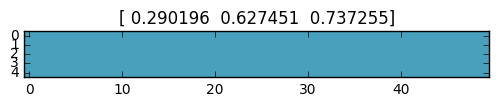

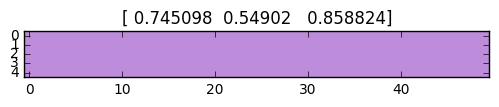

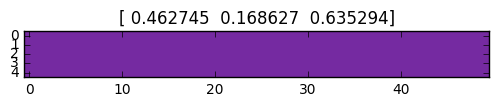

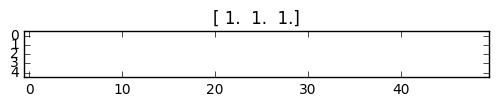

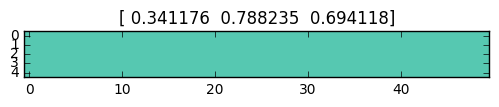

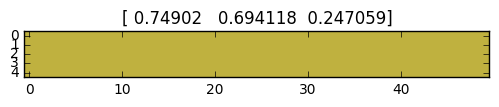

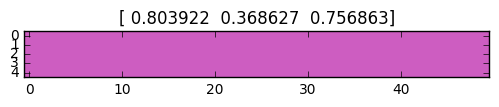

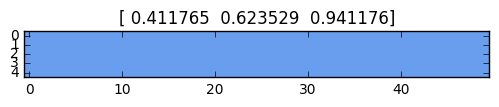

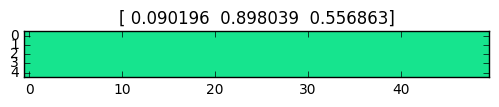

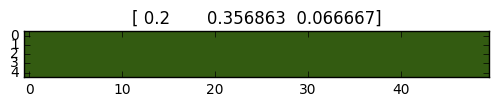

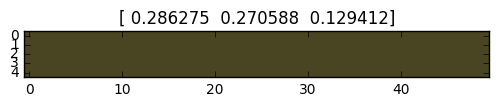

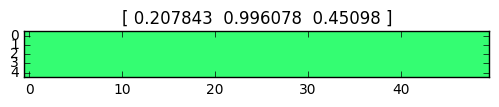

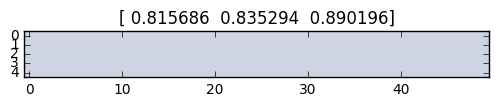

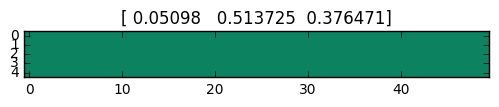

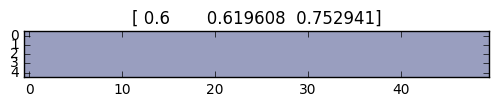

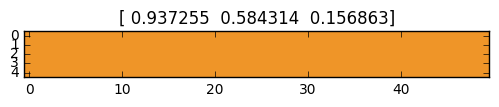

In [3]:
for s, c in colors.iteritems():
    v = np.zeros((5,50,3))
    v[:, :] = np.array(c)
    plt.imshow(v)
    plt.title(str(c))
    plt.show()

In [4]:
atlas_name = 'atlasV2'

In [5]:
high_contrast_colors = np.random.permutation(high_contrast_colors)
map_name_s_to_color = {s: np.array(high_contrast_colors[i%len(high_contrast_colors)]) 
                     for i, s in enumerate(all_known_structures_sided) }
map_name_u_to_color = {s: np.array(high_contrast_colors[i%len(high_contrast_colors)]) 
                     for i, s in enumerate(all_known_structures) }

In [6]:
stack_colors = {n: np.array(high_contrast_colors[i%len(high_contrast_colors)]) for i, n in enumerate(all_stacks)}

# Genrate mesh for subject volume mapped back to atlas space

In [7]:
classifier_setting = 2

In [8]:
warp_setting = 3

In [15]:
# Render globally transformed atlas structures

for stack in all_nissl_stacks:
# for stack in ['MD590']:
    
    for structure in all_known_structures_sided:
#     for structure in ['7N_L']:

        print structure
        
        try:
            reversed_volume = \
        DataManager.load_transformed_volume(stack_m=atlas_name, stack_f=stack,
                                           classifier_setting_m=classifier_setting,
                                           classifier_setting_f=classifier_setting,
                                           warp_setting=warp_setting,
                                           structure=structure)

        #     xmin, xmax, ymin, ymax, zmin, zmax = bbox_3d(reversed_volume)
        #     vol = reversed_volume[ymin:ymax+1, xmin:xmax+1, zmin:zmax+1]

        #     dense_vol = fill_sparse_score_volume(vol)

            t = time.time()

            polydata = volume_to_polydata(reversed_volume, origin=(0,0,0), num_simplify_iter=3, smooth=True, level=.5)

            sys.stderr.write('time: %.2f\n' % (time.time() - t)) # 10s

            mesh_fn = DataManager.get_transformed_volume_mesh_filepath(stack_m=atlas_name, stack_f=stack,
                                                                      classifier_setting_m=classifier_setting,
                                                                      classifier_setting_f=classifier_setting,
                                                                      warp_setting=warp_setting,
                                                                      structure=structure)

            save_mesh(polydata, mesh_fn)
            
        except Exception as e:
            sys.stderr.write('%s\n' % e)
            sys.stderr.write('Error transforming volume %s.\n' % structure)

5N_L


marching cube: 7.86 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7431: 0.07 seconds
simplify 1 @ 1487: 0.06 seconds
simplify 2 @ 298: 0.02 seconds
time: 8.59


5N_R


marching cube: 8.30 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7510: 0.07 seconds
simplify 1 @ 1503: 0.06 seconds
simplify 2 @ 302: 0.02 seconds
time: 9.11


6N_L


marching cube: 8.43 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 764: 0.01 seconds
time: 9.12


6N_R


marching cube: 8.80 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 731: 0.01 seconds
time: 9.46


7N_L


marching cube: 6.14 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12749: 0.10 seconds
simplify 1 @ 2550: 0.10 seconds
simplify 2 @ 511: 0.02 seconds
time: 6.99


7N_R


marching cube: 6.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12786: 0.10 seconds
simplify 1 @ 2557: 0.10 seconds
simplify 2 @ 513: 0.02 seconds
time: 6.92


7n_L


marching cube: 10.24 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9515: 0.08 seconds
simplify 1 @ 1904: 0.08 seconds
simplify 2 @ 382: 0.02 seconds
time: 11.08


7n_R


marching cube: 8.39 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9378: 0.07 seconds
simplify 1 @ 1876: 0.07 seconds
simplify 2 @ 376: 0.02 seconds
time: 9.23


Amb_L


marching cube: 8.27 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 975: 0.01 seconds
time: 8.93


Amb_R


marching cube: 8.61 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 940: 0.01 seconds
time: 9.39


LC_L


marching cube: 6.20 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3420: 0.03 seconds
simplify 1 @ 685: 0.02 seconds
time: 6.83


LC_R


marching cube: 10.21 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3530: 0.04 seconds
simplify 1 @ 707: 0.03 seconds
time: 11.45


LRt_L


marching cube: 6.15 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 8118: 0.10 seconds
simplify 1 @ 1623: 0.08 seconds
simplify 2 @ 326: 0.02 seconds
time: 7.00


LRt_R


marching cube: 10.40 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 10301: 0.10 seconds
simplify 1 @ 2060: 0.09 seconds
simplify 2 @ 413: 0.02 seconds
time: 11.29


Pn_L


marching cube: 6.63 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17237: 0.14 seconds
simplify 1 @ 3448: 0.15 seconds
simplify 2 @ 690: 0.03 seconds
time: 7.72


Pn_R


marching cube: 10.07 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 17325: 0.16 seconds
simplify 1 @ 3464: 0.17 seconds
simplify 2 @ 694: 0.04 seconds
time: 11.11


Tz_L


marching cube: 8.33 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5686: 0.04 seconds
simplify 1 @ 1138: 0.04 seconds
simplify 2 @ 229: 0.01 seconds
time: 9.17


Tz_R


marching cube: 8.49 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5171: 0.05 seconds
simplify 1 @ 1035: 0.04 seconds
simplify 2 @ 208: 0.01 seconds
time: 9.25


VLL_L


marching cube: 6.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11306: 0.09 seconds
simplify 1 @ 2261: 0.09 seconds
simplify 2 @ 453: 0.02 seconds
time: 7.01


VLL_R


marching cube: 10.46 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11421: 0.10 seconds
simplify 1 @ 2283: 0.10 seconds
simplify 2 @ 458: 0.02 seconds
time: 11.35


RMC_L


marching cube: 7.60 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6270: 0.05 seconds
simplify 1 @ 1256: 0.05 seconds
simplify 2 @ 252: 0.01 seconds
time: 8.46


RMC_R


marching cube: 5.89 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 6524: 0.09 seconds
simplify 1 @ 1306: 0.10 seconds
simplify 2 @ 262: 0.02 seconds
time: 6.65


SNC_L


marching cube: 9.23 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1963: 0.03 seconds
simplify 1 @ 393: 0.02 seconds
time: 10.37


SNC_R


marching cube: 6.88 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
time: 7.91


SNR_L


marching cube: 8.52 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 29699: 0.39 seconds
simplify 1 @ 5937: 0.43 seconds
simplify 2 @ 1188: 0.09 seconds
time: 10.07


SNR_R


marching cube: 8.00 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 26071: 0.23 seconds
simplify 1 @ 5211: 0.23 seconds
simplify 2 @ 1043: 0.05 seconds
time: 9.63


3N_L


marching cube: 9.11 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2527: 0.03 seconds
simplify 1 @ 507: 0.03 seconds
time: 9.77


3N_R


marching cube: 8.71 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2733: 0.04 seconds
simplify 1 @ 548: 0.03 seconds
time: 9.88


4N_L


marching cube: 8.66 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 346: 0.00 seconds
time: 9.75


4N_R


marching cube: 8.40 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 342: 0.00 seconds
time: 9.05


Sp5I_L


marching cube: 7.68 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11919: 0.12 seconds
simplify 1 @ 2383: 0.11 seconds
simplify 2 @ 478: 0.03 seconds
time: 8.69


Sp5I_R


marching cube: 5.88 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 14805: 0.19 seconds
simplify 1 @ 2960: 0.21 seconds
simplify 2 @ 593: 0.05 seconds
time: 6.87


Sp5O_L


marching cube: 8.68 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 12783: 0.27 seconds
simplify 1 @ 2553: 0.19 seconds
simplify 2 @ 512: 0.04 seconds
time: 10.29


Sp5O_R


marching cube: 8.14 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15210: 0.16 seconds
simplify 1 @ 3041: 0.15 seconds
simplify 2 @ 610: 0.03 seconds
time: 9.46


Sp5C_L


marching cube: 8.48 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 30110: 0.28 seconds
simplify 1 @ 6021: 0.27 seconds
simplify 2 @ 1205: 0.06 seconds
time: 9.80


Sp5C_R


marching cube: 8.57 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 32059: 0.38 seconds
simplify 1 @ 6409: 0.48 seconds
simplify 2 @ 1283: 0.11 seconds
time: 10.23


PBG_L


marching cube: 8.79 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1759: 0.03 seconds
simplify 1 @ 353: 0.03 seconds
time: 10.02


PBG_R


marching cube: 8.22 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1898: 0.02 seconds
simplify 1 @ 380: 0.02 seconds
time: 9.33


10N_L


marching cube: 8.54 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3101: 0.03 seconds
simplify 1 @ 621: 0.02 seconds
time: 9.26


10N_R


marching cube: 8.39 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3032: 0.02 seconds
simplify 1 @ 608: 0.02 seconds
time: 9.09


VCA_L


marching cube: 8.42 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12037: 0.11 seconds
simplify 1 @ 2406: 0.12 seconds
simplify 2 @ 482: 0.04 seconds
time: 9.36


VCA_R


marching cube: 8.87 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 12484: 0.17 seconds
simplify 1 @ 2497: 0.16 seconds
simplify 2 @ 501: 0.04 seconds
time: 10.34


VCP_L


marching cube: 8.91 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6927: 0.06 seconds
simplify 1 @ 1386: 0.06 seconds
simplify 2 @ 278: 0.01 seconds
time: 10.14


VCP_R


marching cube: 8.53 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7167: 0.07 seconds
simplify 1 @ 1434: 0.06 seconds
simplify 2 @ 288: 0.02 seconds
time: 9.33


DC_L


marching cube: 8.51 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11074: 0.09 seconds
simplify 1 @ 2214: 0.09 seconds
simplify 2 @ 444: 0.02 seconds
time: 9.36


DC_R


marching cube: 9.00 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 11723: 0.15 seconds
simplify 1 @ 2339: 0.15 seconds
simplify 2 @ 467: 0.03 seconds
time: 10.02


AP


marching cube: 9.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3344: 0.04 seconds
simplify 1 @ 670: 0.04 seconds
time: 10.24


12N


marching cube: 6.83 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13772: 0.10 seconds
simplify 1 @ 2755: 0.10 seconds
simplify 2 @ 552: 0.02 seconds
time: 7.88


RtTg


marching cube: 9.37 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 26639: 0.40 seconds
simplify 1 @ 5318: 0.39 seconds
simplify 2 @ 1065: 0.08 seconds
time: 10.89


sp5
outerContour
SC


File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD585_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD585_down32_scoreVolume_clf_2_trial_0_sp5.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD585_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD585_down32_scoreVolume_clf_2_trial_0_sp5.bp'
Error transforming volume sp5.
File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD585_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD585_down32_scoreVolume_clf_2_trial_0_outerContour.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD585_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD585_down32_scoreVolume_clf_2_

IC


marching cube: 9.18 seconds
mesh_to_polydata: 0.19 seconds
simplify 0 @ 83103: 1.46 seconds
simplify 1 @ 16599: 1.16 seconds
simplify 2 @ 3320: 0.21 seconds
time: 13.04


5N_L


marching cube: 8.66 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7263: 0.06 seconds
simplify 1 @ 1454: 0.06 seconds
simplify 2 @ 292: 0.01 seconds
time: 9.55


5N_R


marching cube: 8.65 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7283: 0.07 seconds
simplify 1 @ 1458: 0.06 seconds
simplify 2 @ 293: 0.02 seconds
time: 9.45


6N_L


marching cube: 6.87 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 677: 0.00 seconds
time: 7.62


6N_R


marching cube: 7.45 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 724: 0.01 seconds
time: 8.00


7N_L


marching cube: 8.31 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12108: 0.11 seconds
simplify 1 @ 2423: 0.11 seconds
simplify 2 @ 486: 0.02 seconds
time: 9.43


7N_R


marching cube: 8.89 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11765: 0.11 seconds
simplify 1 @ 2355: 0.11 seconds
simplify 2 @ 472: 0.02 seconds
time: 9.90


7n_L


marching cube: 8.76 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8770: 0.08 seconds
simplify 1 @ 1756: 0.08 seconds
simplify 2 @ 352: 0.02 seconds
time: 9.59


7n_R


marching cube: 7.59 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9021: 0.05 seconds
simplify 1 @ 1806: 0.06 seconds
simplify 2 @ 362: 0.01 seconds
time: 8.46


Amb_L


marching cube: 5.52 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 900: 0.01 seconds
time: 6.05


Amb_R


marching cube: 8.97 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 939: 0.01 seconds
time: 9.55


LC_L


marching cube: 6.61 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3498: 0.03 seconds
simplify 1 @ 701: 0.03 seconds
time: 7.24


LC_R


marching cube: 10.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3535: 0.03 seconds
simplify 1 @ 708: 0.03 seconds
time: 11.42


LRt_L


marching cube: 9.19 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 10676: 0.16 seconds
simplify 1 @ 2136: 0.14 seconds
simplify 2 @ 428: 0.03 seconds
time: 10.21


LRt_R


marching cube: 9.23 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 10453: 0.10 seconds
simplify 1 @ 2092: 0.10 seconds
simplify 2 @ 419: 0.02 seconds
time: 10.55


Pn_L


marching cube: 8.36 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15780: 0.14 seconds
simplify 1 @ 3158: 0.14 seconds
simplify 2 @ 633: 0.03 seconds
time: 9.34


Pn_R


marching cube: 8.58 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16250: 0.15 seconds
simplify 1 @ 3254: 0.16 seconds
simplify 2 @ 651: 0.03 seconds
time: 9.59


Tz_L


marching cube: 6.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4381: 0.04 seconds
simplify 1 @ 877: 0.03 seconds
time: 6.75


Tz_R


marching cube: 10.42 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4590: 0.05 seconds
simplify 1 @ 919: 0.04 seconds
time: 11.15


VLL_L


marching cube: 8.33 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10719: 0.09 seconds
simplify 1 @ 2145: 0.08 seconds
simplify 2 @ 430: 0.02 seconds
time: 9.18


VLL_R


marching cube: 8.78 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 10624: 0.10 seconds
simplify 1 @ 2126: 0.10 seconds
simplify 2 @ 426: 0.02 seconds
time: 9.65


RMC_L


marching cube: 6.21 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5862: 0.05 seconds
simplify 1 @ 1174: 0.04 seconds
simplify 2 @ 236: 0.01 seconds
time: 6.88


RMC_R


marching cube: 10.72 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6112: 0.05 seconds
simplify 1 @ 1224: 0.05 seconds
simplify 2 @ 246: 0.01 seconds
time: 11.49


SNC_L


marching cube: 8.35 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6375: 0.04 seconds
simplify 1 @ 1276: 0.05 seconds
simplify 2 @ 256: 0.01 seconds
time: 9.10


SNC_R


marching cube: 8.64 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5545: 0.04 seconds
simplify 1 @ 1110: 0.04 seconds
simplify 2 @ 223: 0.01 seconds
time: 9.47


SNR_L


marching cube: 6.26 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 28042: 0.21 seconds
simplify 1 @ 5611: 0.24 seconds
simplify 2 @ 1123: 0.05 seconds
time: 7.37


SNR_R


marching cube: 6.50 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 27243: 0.23 seconds
simplify 1 @ 5450: 0.26 seconds
simplify 2 @ 1091: 0.05 seconds
time: 7.65


3N_L


marching cube: 6.18 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2472: 0.02 seconds
simplify 1 @ 496: 0.02 seconds
time: 6.81


3N_R


marching cube: 10.59 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2853: 0.03 seconds
simplify 1 @ 572: 0.02 seconds
time: 11.28


4N_L


marching cube: 8.73 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 313: 0.00 seconds
time: 9.38


4N_R


marching cube: 7.52 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 323: 0.00 seconds
time: 8.26


Sp5I_L


marching cube: 9.85 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12929: 0.11 seconds
simplify 1 @ 2583: 0.11 seconds
simplify 2 @ 518: 0.02 seconds
time: 11.35


Sp5I_R


marching cube: 6.11 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12178: 0.10 seconds
simplify 1 @ 2438: 0.10 seconds
simplify 2 @ 488: 0.02 seconds
time: 7.00


Sp5O_L


marching cube: 10.53 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13316: 0.16 seconds
simplify 1 @ 2660: 0.12 seconds
simplify 2 @ 534: 0.03 seconds
time: 11.50


Sp5O_R


marching cube: 6.76 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14462: 0.15 seconds
simplify 1 @ 2890: 0.12 seconds
simplify 2 @ 578: 0.03 seconds
time: 7.82


Sp5C_L


marching cube: 10.49 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 29945: 0.30 seconds
simplify 1 @ 5992: 0.32 seconds
simplify 2 @ 1199: 0.07 seconds
time: 11.87


Sp5C_R


marching cube: 8.41 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 32955: 0.27 seconds
simplify 1 @ 6594: 0.32 seconds
simplify 2 @ 1320: 0.07 seconds
time: 9.84


PBG_L


marching cube: 6.03 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1645: 0.01 seconds
simplify 1 @ 330: 0.01 seconds
time: 6.68


PBG_R


marching cube: 10.54 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1392: 0.01 seconds
simplify 1 @ 280: 0.01 seconds
time: 11.21


10N_L


marching cube: 8.72 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2589: 0.02 seconds
simplify 1 @ 519: 0.02 seconds
time: 9.42


10N_R


marching cube: 8.30 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3032: 0.02 seconds
simplify 1 @ 608: 0.02 seconds
time: 8.99


VCA_L


marching cube: 8.86 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 11614: 0.17 seconds
simplify 1 @ 2324: 0.16 seconds
simplify 2 @ 466: 0.03 seconds
time: 9.98


VCA_R


marching cube: 9.10 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10108: 0.11 seconds
simplify 1 @ 2023: 0.08 seconds
simplify 2 @ 406: 0.02 seconds
time: 10.46


VCP_L


marching cube: 11.16 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 7881: 0.12 seconds
simplify 1 @ 1578: 0.13 seconds
simplify 2 @ 317: 0.03 seconds
time: 12.16


VCP_R


marching cube: 10.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 8357: 0.11 seconds
simplify 1 @ 1673: 0.11 seconds
simplify 2 @ 336: 0.02 seconds
time: 11.66


DC_L


marching cube: 9.30 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 10915: 0.14 seconds
simplify 1 @ 2186: 0.14 seconds
simplify 2 @ 438: 0.03 seconds
time: 10.73


DC_R


marching cube: 8.89 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11947: 0.10 seconds
simplify 1 @ 2389: 0.11 seconds
simplify 2 @ 479: 0.02 seconds
time: 10.15


AP


marching cube: 9.50 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2759: 0.03 seconds
simplify 1 @ 553: 0.02 seconds
time: 10.20


12N


marching cube: 8.90 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 11962: 0.17 seconds
simplify 1 @ 2394: 0.16 seconds
simplify 2 @ 480: 0.04 seconds
time: 9.97


RtTg


marching cube: 7.42 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 24925: 0.21 seconds
simplify 1 @ 4980: 0.22 seconds
simplify 2 @ 998: 0.04 seconds
time: 9.01
File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD589_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD589_down32_scoreVolume_clf_2_trial_0_sp5.bp


sp5
outerContour
SC


[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD589_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD589_down32_scoreVolume_clf_2_trial_0_sp5.bp'
Error transforming volume sp5.
File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD589_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD589_down32_scoreVolume_clf_2_trial_0_outerContour.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD589_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD589_down32_scoreVolume_clf_2_trial_0_outerContour.bp'
Error transforming volume outerContour.
marching cube: 8.44 seconds
mesh_to_polydata: 0.31 seconds
simplify 0 @ 112558: 1.92 seconds
simplify 1 @ 22525: 2.01 seconds
simplify 2 @ 4504: 0.36 seconds
time: 13.64


IC


marching cube: 8.68 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 74502: 0.79 seconds
simplify 1 @ 14908: 0.83 seconds
simplify 2 @ 2982: 0.16 seconds
time: 11.26


5N_L


marching cube: 8.16 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11712: 0.08 seconds
simplify 1 @ 2346: 0.09 seconds
simplify 2 @ 478: 0.02 seconds
time: 9.04


5N_R


marching cube: 6.17 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11973: 0.09 seconds
simplify 1 @ 2386: 0.10 seconds
simplify 2 @ 482: 0.02 seconds
time: 6.97


6N_L


marching cube: 10.40 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 834: 0.01 seconds
time: 11.41


6N_R


marching cube: 8.46 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 852: 0.01 seconds
time: 9.13


7N_L


marching cube: 7.82 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23568: 0.24 seconds
simplify 1 @ 4703: 0.21 seconds
simplify 2 @ 952: 0.04 seconds
time: 9.42


7N_R


marching cube: 7.08 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 23370: 0.35 seconds
simplify 1 @ 4662: 0.43 seconds
simplify 2 @ 953: 0.09 seconds
time: 8.60


7n_L


marching cube: 9.02 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12470: 0.11 seconds
simplify 1 @ 2484: 0.12 seconds
simplify 2 @ 506: 0.03 seconds
time: 10.60


7n_R


marching cube: 6.25 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12801: 0.10 seconds
simplify 1 @ 2540: 0.12 seconds
simplify 2 @ 514: 0.03 seconds
time: 7.08


Amb_L


marching cube: 10.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1019: 0.01 seconds
simplify 1 @ 205: 0.01 seconds
time: 11.34


Amb_R


marching cube: 6.04 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1070: 0.01 seconds
simplify 1 @ 211: 0.01 seconds
time: 6.69


LC_L


marching cube: 10.37 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5085: 0.04 seconds
simplify 1 @ 1016: 0.04 seconds
simplify 2 @ 210: 0.01 seconds
time: 11.10


LC_R


marching cube: 8.55 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5002: 0.04 seconds
simplify 1 @ 999: 0.04 seconds
simplify 2 @ 204: 0.01 seconds
time: 9.29


LRt_L


marching cube: 8.82 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13796: 0.10 seconds
simplify 1 @ 2755: 0.11 seconds
simplify 2 @ 557: 0.02 seconds
time: 9.71


LRt_R


marching cube: 6.14 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18532: 0.14 seconds
simplify 1 @ 3685: 0.16 seconds
simplify 2 @ 748: 0.03 seconds
time: 7.07


Pn_L


marching cube: 10.55 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 28802: 0.26 seconds
simplify 1 @ 5713: 0.32 seconds
simplify 2 @ 1159: 0.06 seconds
time: 11.94


Pn_R


marching cube: 6.01 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 29331: 0.22 seconds
simplify 1 @ 5848: 0.29 seconds
simplify 2 @ 1181: 0.06 seconds
time: 7.25


Tz_L


marching cube: 10.49 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7029: 0.06 seconds
simplify 1 @ 1403: 0.06 seconds
simplify 2 @ 288: 0.02 seconds
time: 11.28


Tz_R


marching cube: 7.06 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7184: 0.05 seconds
simplify 1 @ 1432: 0.05 seconds
simplify 2 @ 292: 0.01 seconds
time: 7.93


VLL_L


marching cube: 10.50 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15630: 0.13 seconds
simplify 1 @ 3120: 0.14 seconds
simplify 2 @ 633: 0.03 seconds
time: 11.47


VLL_R


marching cube: 8.48 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15747: 0.13 seconds
simplify 1 @ 3146: 0.14 seconds
simplify 2 @ 637: 0.03 seconds
time: 9.47


RMC_L


marching cube: 8.23 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9218: 0.07 seconds
simplify 1 @ 1835: 0.08 seconds
simplify 2 @ 376: 0.02 seconds
time: 9.05


RMC_R


marching cube: 8.49 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9246: 0.08 seconds
simplify 1 @ 1843: 0.09 seconds
simplify 2 @ 377: 0.02 seconds
time: 9.77


SNC_L


marching cube: 7.58 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6949: 0.06 seconds
simplify 1 @ 1359: 0.06 seconds
simplify 2 @ 273: 0.01 seconds
time: 8.46


SNC_R


marching cube: 6.77 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2322: 0.03 seconds
simplify 1 @ 453: 0.03 seconds
time: 7.58


SNR_L


marching cube: 9.50 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 58399: 0.52 seconds
simplify 1 @ 11661: 0.68 seconds
simplify 2 @ 2386: 0.14 seconds
time: 12.10


SNR_R


marching cube: 8.74 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 58189: 0.51 seconds
simplify 1 @ 11628: 0.68 seconds
simplify 2 @ 2409: 0.11 seconds
time: 10.78


3N_L


marching cube: 6.13 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3543: 0.03 seconds
simplify 1 @ 708: 0.03 seconds
time: 6.76


3N_R


marching cube: 10.34 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3734: 0.03 seconds
simplify 1 @ 745: 0.03 seconds
time: 11.11


4N_L


marching cube: 7.13 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 283: 0.00 seconds
time: 7.87


4N_R


marching cube: 10.39 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 297: 0.00 seconds
time: 11.04


Sp5I_L


marching cube: 5.96 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 19436: 0.14 seconds
simplify 1 @ 3881: 0.17 seconds
simplify 2 @ 777: 0.04 seconds
time: 6.98


Sp5I_R


marching cube: 10.12 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 17762: 0.26 seconds
simplify 1 @ 3517: 0.22 seconds
simplify 2 @ 714: 0.04 seconds
time: 11.32


Sp5O_L


marching cube: 8.50 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 20026: 0.19 seconds
simplify 1 @ 3975: 0.19 seconds
simplify 2 @ 802: 0.04 seconds
time: 9.70


Sp5O_R


marching cube: 6.02 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 18407: 0.19 seconds
simplify 1 @ 3661: 0.17 seconds
simplify 2 @ 732: 0.03 seconds
time: 7.08


Sp5C_L


marching cube: 6.07 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 55544: 0.41 seconds
simplify 1 @ 11026: 0.56 seconds
simplify 2 @ 2218: 0.12 seconds
time: 7.87


Sp5C_R


marching cube: 10.20 seconds
mesh_to_polydata: 0.12 seconds
simplify 0 @ 58353: 0.55 seconds
simplify 1 @ 11597: 0.71 seconds
simplify 2 @ 2342: 0.14 seconds
time: 12.37


PBG_L


marching cube: 6.57 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1733: 0.01 seconds
simplify 1 @ 342: 0.01 seconds
time: 7.34


PBG_R


marching cube: 9.77 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1945: 0.03 seconds
simplify 1 @ 384: 0.02 seconds
time: 10.54


10N_L


marching cube: 7.60 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3165: 0.03 seconds
simplify 1 @ 630: 0.03 seconds
time: 8.63


10N_R


marching cube: 5.34 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3276: 0.02 seconds
simplify 1 @ 648: 0.02 seconds
time: 5.92


VCA_L


marching cube: 8.39 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 19997: 0.25 seconds
simplify 1 @ 3987: 0.21 seconds
simplify 2 @ 809: 0.04 seconds
time: 9.49


VCA_R


marching cube: 6.02 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 19465: 0.16 seconds
simplify 1 @ 3863: 0.18 seconds
simplify 2 @ 787: 0.04 seconds
time: 7.07


VCP_L


marching cube: 10.51 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 10880: 0.10 seconds
simplify 1 @ 2175: 0.10 seconds
simplify 2 @ 440: 0.02 seconds
time: 11.39


VCP_R


marching cube: 7.25 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10215: 0.07 seconds
simplify 1 @ 2035: 0.07 seconds
simplify 2 @ 405: 0.01 seconds
time: 8.15


DC_L


marching cube: 5.86 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 15219: 0.21 seconds
simplify 1 @ 3026: 0.21 seconds
simplify 2 @ 611: 0.05 seconds
time: 6.88


DC_R


marching cube: 8.22 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17072: 0.15 seconds
simplify 1 @ 3386: 0.17 seconds
simplify 2 @ 684: 0.04 seconds
time: 9.69


AP


marching cube: 7.61 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3900: 0.03 seconds
simplify 1 @ 775: 0.03 seconds
time: 8.43


12N


marching cube: 7.60 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 21703: 0.19 seconds
simplify 1 @ 4328: 0.23 seconds
simplify 2 @ 875: 0.05 seconds
time: 8.84


RtTg


marching cube: 7.60 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 41636: 0.42 seconds
simplify 1 @ 8258: 0.48 seconds
simplify 2 @ 1670: 0.10 seconds
time: 9.41
File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD590_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD590_down32_scoreVolume_clf_2_trial_0_sp5.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD590_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD590_down32_scoreVolume_clf_2_trial_0_sp5.bp'
Error transforming volume sp5.


sp5
outerContour
SC


File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD590_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD590_down32_scoreVolume_clf_2_trial_0_outerContour.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD590_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD590_down32_scoreVolume_clf_2_trial_0_outerContour.bp'
Error transforming volume outerContour.
marching cube: 7.26 seconds
mesh_to_polydata: 0.42 seconds
simplify 0 @ 406775: 2.62 seconds
simplify 1 @ 80871: 5.56 seconds
simplify 2 @ 16631: 1.73 seconds
time: 18.41


IC


marching cube: 8.49 seconds
mesh_to_polydata: 0.33 seconds
simplify 0 @ 225134: 2.06 seconds
simplify 1 @ 44750: 2.59 seconds
simplify 2 @ 9155: 0.54 seconds
time: 14.81


5N_L


marching cube: 8.77 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 7846: 0.10 seconds
simplify 1 @ 1569: 0.10 seconds
simplify 2 @ 315: 0.02 seconds
time: 9.56


5N_R


marching cube: 9.15 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 7453: 0.10 seconds
simplify 1 @ 1492: 0.09 seconds
simplify 2 @ 299: 0.02 seconds
time: 10.43


6N_L


marching cube: 7.89 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 757: 0.01 seconds
time: 8.91


6N_R


marching cube: 6.17 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 747: 0.01 seconds
time: 6.81


7N_L


marching cube: 8.34 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 12997: 0.21 seconds
simplify 1 @ 2602: 0.17 seconds
simplify 2 @ 521: 0.04 seconds
time: 9.36


7N_R


marching cube: 8.44 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12773: 0.12 seconds
simplify 1 @ 2554: 0.12 seconds
simplify 2 @ 511: 0.03 seconds
time: 9.81


7n_L


marching cube: 7.60 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9701: 0.08 seconds
simplify 1 @ 1942: 0.09 seconds
simplify 2 @ 389: 0.02 seconds
time: 8.54


7n_R


marching cube: 7.59 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9680: 0.08 seconds
simplify 1 @ 1938: 0.09 seconds
simplify 2 @ 389: 0.02 seconds
time: 8.53


Amb_L


marching cube: 7.58 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1000: 0.01 seconds
simplify 1 @ 201: 0.01 seconds
time: 8.34


Amb_R


marching cube: 7.60 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 942: 0.01 seconds
time: 8.15


LC_L


marching cube: 8.80 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3698: 0.04 seconds
simplify 1 @ 741: 0.03 seconds
time: 9.69


LC_R


marching cube: 8.72 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4038: 0.03 seconds
simplify 1 @ 809: 0.03 seconds
time: 9.46


LRt_L


marching cube: 8.70 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11645: 0.15 seconds
simplify 1 @ 2330: 0.15 seconds
simplify 2 @ 467: 0.03 seconds
time: 9.70


LRt_R


marching cube: 8.38 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11816: 0.11 seconds
simplify 1 @ 2365: 0.11 seconds
simplify 2 @ 474: 0.02 seconds
time: 9.71


Pn_L


marching cube: 7.73 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 18094: 0.16 seconds
simplify 1 @ 3621: 0.18 seconds
simplify 2 @ 725: 0.04 seconds
time: 8.87


Pn_R


marching cube: 7.45 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 16758: 0.23 seconds
simplify 1 @ 3355: 0.23 seconds
simplify 2 @ 672: 0.05 seconds
time: 8.52


Tz_L


marching cube: 8.15 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5117: 0.04 seconds
simplify 1 @ 1025: 0.04 seconds
simplify 2 @ 206: 0.01 seconds
time: 8.94


Tz_R


marching cube: 8.38 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5367: 0.05 seconds
simplify 1 @ 1075: 0.04 seconds
simplify 2 @ 216: 0.01 seconds
time: 9.13


VLL_L


marching cube: 8.58 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11297: 0.10 seconds
simplify 1 @ 2261: 0.10 seconds
simplify 2 @ 453: 0.02 seconds
time: 9.47


VLL_R


marching cube: 6.00 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11186: 0.09 seconds
simplify 1 @ 2239: 0.09 seconds
simplify 2 @ 449: 0.02 seconds
time: 6.84


RMC_L


marching cube: 10.33 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6362: 0.05 seconds
simplify 1 @ 1272: 0.05 seconds
simplify 2 @ 256: 0.01 seconds
time: 11.08


RMC_R


marching cube: 8.48 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6580: 0.05 seconds
simplify 1 @ 1317: 0.05 seconds
simplify 2 @ 265: 0.01 seconds
time: 9.24


SNC_L


marching cube: 5.99 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5170: 0.04 seconds
simplify 1 @ 1035: 0.04 seconds
simplify 2 @ 208: 0.01 seconds
time: 6.72


SNC_R


marching cube: 10.51 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 625: 0.01 seconds
time: 11.17


SNR_L


marching cube: 8.50 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 32139: 0.28 seconds
simplify 1 @ 6434: 0.29 seconds
simplify 2 @ 1287: 0.06 seconds
time: 9.85


SNR_R


marching cube: 8.79 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 30023: 0.33 seconds
simplify 1 @ 6004: 0.46 seconds
simplify 2 @ 1202: 0.10 seconds
time: 10.37


3N_L


marching cube: 8.63 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2800: 0.04 seconds
simplify 1 @ 561: 0.03 seconds
time: 9.80


3N_R


marching cube: 8.52 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2513: 0.02 seconds
simplify 1 @ 504: 0.02 seconds
time: 9.66


4N_L


marching cube: 8.27 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 348: 0.00 seconds
time: 8.92


4N_R


marching cube: 8.49 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 347: 0.00 seconds
time: 9.14


Sp5I_L


marching cube: 8.66 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13526: 0.12 seconds
simplify 1 @ 2703: 0.13 seconds
simplify 2 @ 540: 0.03 seconds
time: 9.60


Sp5I_R


marching cube: 8.55 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 12797: 0.20 seconds
simplify 1 @ 2561: 0.19 seconds
simplify 2 @ 513: 0.04 seconds
time: 10.11


Sp5O_L


marching cube: 8.52 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15077: 0.17 seconds
simplify 1 @ 3016: 0.13 seconds
simplify 2 @ 604: 0.03 seconds
time: 10.03


Sp5O_R


marching cube: 8.49 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13496: 0.14 seconds
simplify 1 @ 2697: 0.11 seconds
simplify 2 @ 540: 0.03 seconds
time: 9.45


Sp5C_L


marching cube: 8.46 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 34338: 0.28 seconds
simplify 1 @ 6867: 0.34 seconds
simplify 2 @ 1373: 0.07 seconds
time: 9.87


Sp5C_R


marching cube: 8.76 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 35065: 0.46 seconds
simplify 1 @ 7015: 0.54 seconds
simplify 2 @ 1404: 0.13 seconds
time: 10.89


PBG_L


marching cube: 8.54 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1705: 0.02 seconds
simplify 1 @ 342: 0.01 seconds
time: 9.66


PBG_R


marching cube: 8.28 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 843: 0.01 seconds
time: 8.96


10N_L


marching cube: 8.48 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3150: 0.02 seconds
simplify 1 @ 632: 0.02 seconds
time: 9.19


10N_R


marching cube: 8.41 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3046: 0.02 seconds
simplify 1 @ 611: 0.02 seconds
time: 9.10


VCA_L


marching cube: 8.29 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12503: 0.12 seconds
simplify 1 @ 2502: 0.09 seconds
simplify 2 @ 501: 0.02 seconds
time: 9.50


VCA_R


marching cube: 6.29 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 9114: 0.21 seconds
simplify 1 @ 1824: 0.15 seconds
simplify 2 @ 366: 0.03 seconds
time: 7.27


VCP_L


marching cube: 9.86 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7791: 0.07 seconds
simplify 1 @ 1560: 0.07 seconds
simplify 2 @ 313: 0.02 seconds
time: 11.34


VCP_R


marching cube: 6.19 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7522: 0.06 seconds
simplify 1 @ 1506: 0.06 seconds
simplify 2 @ 302: 0.01 seconds
time: 6.93


DC_L


marching cube: 10.77 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12837: 0.10 seconds
simplify 1 @ 2568: 0.11 seconds
simplify 2 @ 515: 0.03 seconds
time: 11.71


DC_R


marching cube: 8.24 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12130: 0.09 seconds
simplify 1 @ 2425: 0.10 seconds
simplify 2 @ 486: 0.02 seconds
time: 9.12


AP


marching cube: 8.64 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2919: 0.04 seconds
simplify 1 @ 585: 0.04 seconds
time: 9.66


12N


marching cube: 8.89 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 13651: 0.19 seconds
simplify 1 @ 2731: 0.19 seconds
simplify 2 @ 547: 0.04 seconds
time: 10.44


RtTg


marching cube: 8.41 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 27091: 0.26 seconds
simplify 1 @ 5417: 0.26 seconds
simplify 2 @ 1085: 0.05 seconds
time: 9.67


sp5
outerContour
SC


File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD591_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD591_down32_scoreVolume_clf_2_trial_0_sp5.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD591_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD591_down32_scoreVolume_clf_2_trial_0_sp5.bp'
Error transforming volume sp5.
File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD591_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD591_down32_scoreVolume_clf_2_trial_0_outerContour.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD591_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD591_down32_scoreVolume_clf_2_

IC


marching cube: 6.32 seconds
mesh_to_polydata: 0.11 seconds
simplify 0 @ 87821: 0.91 seconds
simplify 1 @ 17565: 1.71 seconds
simplify 2 @ 3511: 0.38 seconds
time: 10.03


5N_L


marching cube: 9.22 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 7722: 0.11 seconds
simplify 1 @ 1546: 0.11 seconds
simplify 2 @ 310: 0.02 seconds
time: 10.79


5N_R


marching cube: 8.72 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 7970: 0.11 seconds
simplify 1 @ 1596: 0.12 seconds
simplify 2 @ 320: 0.02 seconds
time: 10.09


6N_L


marching cube: 8.38 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 727: 0.01 seconds
time: 9.32


6N_R


marching cube: 8.41 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 710: 0.01 seconds
time: 9.17


7N_L


marching cube: 8.48 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13443: 0.10 seconds
simplify 1 @ 2691: 0.12 seconds
simplify 2 @ 539: 0.03 seconds
time: 9.39


7N_R


marching cube: 6.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13303: 0.11 seconds
simplify 1 @ 2662: 0.11 seconds
simplify 2 @ 533: 0.03 seconds
time: 6.95


7n_L


marching cube: 10.58 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9428: 0.07 seconds
simplify 1 @ 1887: 0.08 seconds
simplify 2 @ 379: 0.02 seconds
time: 11.41


7n_R


marching cube: 8.40 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9958: 0.08 seconds
simplify 1 @ 1993: 0.08 seconds
simplify 2 @ 400: 0.02 seconds
time: 9.23


Amb_L


marching cube: 8.34 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1004: 0.01 seconds
simplify 1 @ 202: 0.01 seconds
time: 9.01


Amb_R


marching cube: 9.13 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1032: 0.01 seconds
simplify 1 @ 208: 0.01 seconds
time: 10.28


LC_L


marching cube: 8.72 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3750: 0.03 seconds
simplify 1 @ 751: 0.03 seconds
time: 9.91


LC_R


marching cube: 8.50 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3787: 0.04 seconds
simplify 1 @ 759: 0.03 seconds
time: 9.25


LRt_L


marching cube: 8.32 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12122: 0.10 seconds
simplify 1 @ 2426: 0.10 seconds
simplify 2 @ 486: 0.02 seconds
time: 9.21


LRt_R


marching cube: 6.01 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12016: 0.10 seconds
simplify 1 @ 2405: 0.10 seconds
simplify 2 @ 482: 0.02 seconds
time: 6.88


Pn_L


marching cube: 10.42 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17047: 0.14 seconds
simplify 1 @ 3412: 0.16 seconds
simplify 2 @ 683: 0.03 seconds
time: 11.42


Pn_R


marching cube: 8.20 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17024: 0.16 seconds
simplify 1 @ 3408: 0.16 seconds
simplify 2 @ 683: 0.04 seconds
time: 9.23


Tz_L


marching cube: 8.45 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5193: 0.04 seconds
simplify 1 @ 1040: 0.04 seconds
simplify 2 @ 209: 0.01 seconds
time: 9.21


Tz_R


marching cube: 8.39 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5517: 0.07 seconds
simplify 1 @ 1105: 0.07 seconds
simplify 2 @ 222: 0.02 seconds
time: 9.35


VLL_L


marching cube: 7.83 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11429: 0.08 seconds
simplify 1 @ 2287: 0.09 seconds
simplify 2 @ 459: 0.02 seconds
time: 9.16


VLL_R


marching cube: 8.35 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 11485: 0.19 seconds
simplify 1 @ 2298: 0.19 seconds
simplify 2 @ 461: 0.04 seconds
time: 9.38


RMC_L


marching cube: 8.72 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6352: 0.08 seconds
simplify 1 @ 1272: 0.09 seconds
simplify 2 @ 255: 0.02 seconds
time: 10.08


RMC_R


marching cube: 9.31 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6294: 0.05 seconds
simplify 1 @ 1260: 0.05 seconds
simplify 2 @ 253: 0.01 seconds
time: 10.52


SNC_L


marching cube: 8.40 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6047: 0.05 seconds
simplify 1 @ 1212: 0.05 seconds
simplify 2 @ 243: 0.01 seconds
time: 9.16


SNC_R


marching cube: 8.49 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6458: 0.05 seconds
simplify 1 @ 1293: 0.05 seconds
simplify 2 @ 260: 0.01 seconds
time: 9.25


SNR_L


marching cube: 8.81 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 30276: 0.28 seconds
simplify 1 @ 6058: 0.32 seconds
simplify 2 @ 1212: 0.07 seconds
time: 10.17


SNR_R


marching cube: 6.27 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 30895: 0.28 seconds
simplify 1 @ 6182: 0.42 seconds
simplify 2 @ 1237: 0.12 seconds
time: 7.70


3N_L


marching cube: 9.34 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2853: 0.02 seconds
simplify 1 @ 572: 0.02 seconds
time: 10.71


3N_R


marching cube: 8.65 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2582: 0.04 seconds
simplify 1 @ 518: 0.03 seconds
time: 9.46


4N_L


marching cube: 9.24 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 340: 0.01 seconds
time: 10.34


4N_R


marching cube: 8.29 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 342: 0.00 seconds
time: 9.23


Sp5I_L


marching cube: 7.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12435: 0.11 seconds
simplify 1 @ 2485: 0.10 seconds
simplify 2 @ 498: 0.02 seconds
time: 8.05


Sp5I_R


marching cube: 9.84 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 12766: 0.18 seconds
simplify 1 @ 2555: 0.18 seconds
simplify 2 @ 513: 0.04 seconds
time: 10.91


Sp5O_L


marching cube: 8.45 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13899: 0.14 seconds
simplify 1 @ 2778: 0.12 seconds
simplify 2 @ 557: 0.03 seconds
time: 9.60


Sp5O_R


marching cube: 8.34 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14435: 0.14 seconds
simplify 1 @ 2887: 0.12 seconds
simplify 2 @ 578: 0.03 seconds
time: 9.29


Sp5C_L


marching cube: 8.62 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 34442: 0.31 seconds
simplify 1 @ 6890: 0.37 seconds
simplify 2 @ 1378: 0.08 seconds
time: 10.07


Sp5C_R


marching cube: 8.12 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 36015: 0.26 seconds
simplify 1 @ 7206: 0.34 seconds
simplify 2 @ 1442: 0.07 seconds
time: 9.96


PBG_L


marching cube: 8.30 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 709: 0.02 seconds
time: 8.91


PBG_R


marching cube: 9.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 312: 0.01 seconds
time: 10.21


10N_L


marching cube: 8.60 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3034: 0.04 seconds
simplify 1 @ 608: 0.04 seconds
time: 9.78


10N_R


marching cube: 8.33 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3052: 0.02 seconds
simplify 1 @ 612: 0.02 seconds
time: 9.14


VCA_L


marching cube: 8.50 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12472: 0.13 seconds
simplify 1 @ 2496: 0.12 seconds
simplify 2 @ 500: 0.03 seconds
time: 9.45


VCA_R


marching cube: 8.64 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11666: 0.11 seconds
simplify 1 @ 2335: 0.09 seconds
simplify 2 @ 468: 0.02 seconds
time: 9.53


VCP_L


marching cube: 8.93 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 7966: 0.11 seconds
simplify 1 @ 1595: 0.11 seconds
simplify 2 @ 320: 0.03 seconds
time: 10.27


VCP_R


marching cube: 8.18 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 8043: 0.10 seconds
simplify 1 @ 1610: 0.11 seconds
simplify 2 @ 323: 0.02 seconds
time: 9.55


DC_L


marching cube: 8.43 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12146: 0.09 seconds
simplify 1 @ 2430: 0.11 seconds
simplify 2 @ 488: 0.02 seconds
time: 9.45


DC_R


marching cube: 8.30 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12371: 0.09 seconds
simplify 1 @ 2476: 0.10 seconds
simplify 2 @ 496: 0.02 seconds
time: 9.18


AP


marching cube: 8.14 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2995: 0.02 seconds
simplify 1 @ 600: 0.02 seconds
time: 8.85


12N


marching cube: 6.17 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13259: 0.11 seconds
simplify 1 @ 2653: 0.11 seconds
simplify 2 @ 532: 0.02 seconds
time: 7.07


RtTg


marching cube: 10.52 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 26999: 0.25 seconds
simplify 1 @ 5397: 0.25 seconds
simplify 2 @ 1077: 0.05 seconds
time: 11.77


sp5
outerContour
SC


File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD592_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD592_down32_scoreVolume_clf_2_trial_0_sp5.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD592_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD592_down32_scoreVolume_clf_2_trial_0_sp5.bp'
Error transforming volume sp5.
File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD592_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD592_down32_scoreVolume_clf_2_trial_0_outerContour.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD592_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD592_down32_scoreVolume_clf_2_

IC


marching cube: 8.33 seconds
mesh_to_polydata: 0.11 seconds
simplify 0 @ 86531: 0.82 seconds
simplify 1 @ 17313: 0.95 seconds
simplify 2 @ 3463: 0.20 seconds
time: 11.06


5N_L


marching cube: 6.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7385: 0.06 seconds
simplify 1 @ 1479: 0.06 seconds
simplify 2 @ 297: 0.01 seconds
time: 6.82


5N_R


marching cube: 10.31 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7493: 0.06 seconds
simplify 1 @ 1501: 0.06 seconds
simplify 2 @ 301: 0.01 seconds
time: 11.10


6N_L


marching cube: 8.29 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 754: 0.01 seconds
time: 8.94


6N_R


marching cube: 8.26 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 750: 0.01 seconds
time: 8.91


7N_L


marching cube: 8.19 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13210: 0.12 seconds
simplify 1 @ 2645: 0.13 seconds
simplify 2 @ 530: 0.03 seconds
time: 9.13


7N_R


marching cube: 9.01 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 12796: 0.19 seconds
simplify 1 @ 2561: 0.20 seconds
simplify 2 @ 513: 0.04 seconds
time: 10.56


7n_L


marching cube: 8.24 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9880: 0.09 seconds
simplify 1 @ 1977: 0.09 seconds
simplify 2 @ 397: 0.02 seconds
time: 9.53


7n_R


marching cube: 8.50 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9342: 0.07 seconds
simplify 1 @ 1870: 0.08 seconds
simplify 2 @ 375: 0.02 seconds
time: 9.42


Amb_L


marching cube: 8.52 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 996: 0.01 seconds
simplify 1 @ 200: 0.01 seconds
time: 9.19


Amb_R


marching cube: 8.61 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 938: 0.01 seconds
time: 9.28


LC_L


marching cube: 8.36 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3406: 0.06 seconds
simplify 1 @ 682: 0.04 seconds
time: 9.59


LC_R


marching cube: 8.33 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3673: 0.05 seconds
simplify 1 @ 736: 0.05 seconds
time: 9.54


LRt_L


marching cube: 6.39 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11526: 0.08 seconds
simplify 1 @ 2307: 0.08 seconds
simplify 2 @ 462: 0.02 seconds
time: 7.41


LRt_R


marching cube: 8.82 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 11895: 0.17 seconds
simplify 1 @ 2380: 0.18 seconds
simplify 2 @ 477: 0.04 seconds
time: 9.81


Pn_L


marching cube: 8.82 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 16319: 0.23 seconds
simplify 1 @ 3265: 0.23 seconds
simplify 2 @ 654: 0.05 seconds
time: 10.45


Pn_R


marching cube: 8.48 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16453: 0.14 seconds
simplify 1 @ 3292: 0.14 seconds
simplify 2 @ 659: 0.03 seconds
time: 9.71


Tz_L


marching cube: 8.48 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5166: 0.05 seconds
simplify 1 @ 1035: 0.04 seconds
simplify 2 @ 208: 0.01 seconds
time: 9.25


Tz_R


marching cube: 8.44 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5219: 0.04 seconds
simplify 1 @ 1045: 0.04 seconds
simplify 2 @ 210: 0.01 seconds
time: 9.20


VLL_L


marching cube: 8.46 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 11410: 0.16 seconds
simplify 1 @ 2283: 0.15 seconds
simplify 2 @ 458: 0.03 seconds
time: 9.55


VLL_R


marching cube: 8.13 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11205: 0.11 seconds
simplify 1 @ 2242: 0.10 seconds
simplify 2 @ 450: 0.02 seconds
time: 9.45


RMC_L


marching cube: 5.74 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6203: 0.04 seconds
simplify 1 @ 1242: 0.04 seconds
simplify 2 @ 249: 0.01 seconds
time: 6.57


RMC_R


marching cube: 8.36 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6274: 0.05 seconds
simplify 1 @ 1256: 0.05 seconds
simplify 2 @ 252: 0.01 seconds
time: 9.06


SNC_L


marching cube: 8.84 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 576: 0.01 seconds
time: 9.51


SNC_R


marching cube: 8.57 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1829: 0.02 seconds
simplify 1 @ 366: 0.02 seconds
time: 9.71


SNR_L


marching cube: 6.90 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 29727: 0.22 seconds
simplify 1 @ 5947: 0.26 seconds
simplify 2 @ 1190: 0.05 seconds
time: 8.55


SNR_R


marching cube: 7.93 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 29890: 0.49 seconds
simplify 1 @ 5979: 0.55 seconds
simplify 2 @ 1197: 0.10 seconds
time: 9.74


3N_L


marching cube: 7.77 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2551: 0.02 seconds
simplify 1 @ 511: 0.02 seconds
time: 8.89


3N_R


marching cube: 6.38 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2465: 0.02 seconds
simplify 1 @ 494: 0.02 seconds
time: 7.00


4N_L


marching cube: 9.68 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 363: 0.00 seconds
time: 11.00


4N_R


marching cube: 8.53 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 389: 0.01 seconds
time: 9.20


Sp5I_L


marching cube: 8.61 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 11667: 0.19 seconds
simplify 1 @ 2335: 0.17 seconds
simplify 2 @ 468: 0.04 seconds
time: 10.16


Sp5I_R


marching cube: 6.64 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13019: 0.10 seconds
simplify 1 @ 2605: 0.10 seconds
simplify 2 @ 522: 0.02 seconds
time: 7.98


Sp5O_L


marching cube: 8.22 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 12707: 0.29 seconds
simplify 1 @ 2542: 0.21 seconds
simplify 2 @ 510: 0.05 seconds
time: 9.39


Sp5O_R


marching cube: 7.73 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12901: 0.13 seconds
simplify 1 @ 2580: 0.10 seconds
simplify 2 @ 518: 0.02 seconds
time: 9.07


Sp5C_L


marching cube: 6.30 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 29908: 0.40 seconds
simplify 1 @ 5983: 0.53 seconds
simplify 2 @ 1198: 0.12 seconds
time: 7.98


Sp5C_R


marching cube: 9.26 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 29361: 0.33 seconds
simplify 1 @ 5874: 0.45 seconds
simplify 2 @ 1176: 0.10 seconds
time: 11.55


PBG_L


marching cube: 8.82 seconds
mesh_to_polydata: No faces are provided, so skip simplification.
mesh_to_polydata: 0.00 seconds
time: 9.91


PBG_R


marching cube: 7.69 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1721: 0.02 seconds
simplify 1 @ 345: 0.01 seconds
time: 8.81


10N_L


marching cube: 7.08 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3026: 0.02 seconds
simplify 1 @ 606: 0.02 seconds
time: 7.88


10N_R


marching cube: 7.66 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2872: 0.04 seconds
simplify 1 @ 576: 0.04 seconds
time: 8.31


VCA_L


marching cube: 8.30 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11790: 0.12 seconds
simplify 1 @ 2360: 0.10 seconds
simplify 2 @ 473: 0.02 seconds
time: 9.29


VCA_R


marching cube: 8.52 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12320: 0.12 seconds
simplify 1 @ 2465: 0.11 seconds
simplify 2 @ 494: 0.02 seconds
time: 9.48


VCP_L


marching cube: 5.99 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8158: 0.06 seconds
simplify 1 @ 1632: 0.06 seconds
simplify 2 @ 327: 0.01 seconds
time: 6.79


VCP_R


marching cube: 10.34 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7957: 0.07 seconds
simplify 1 @ 1593: 0.07 seconds
simplify 2 @ 320: 0.02 seconds
time: 11.16


DC_L


marching cube: 6.08 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11620: 0.08 seconds
simplify 1 @ 2320: 0.08 seconds
simplify 2 @ 465: 0.02 seconds
time: 6.92


DC_R


marching cube: 6.25 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 12534: 0.08 seconds
simplify 1 @ 2504: 0.09 seconds
simplify 2 @ 499: 0.02 seconds
time: 7.03


AP


marching cube: 7.97 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2836: 0.05 seconds
simplify 1 @ 568: 0.04 seconds
time: 8.64


12N


marching cube: 8.36 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 12901: 0.09 seconds
simplify 1 @ 2582: 0.09 seconds
simplify 2 @ 517: 0.02 seconds
time: 9.78


RtTg


marching cube: 6.24 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 26203: 0.43 seconds
simplify 1 @ 5243: 0.47 seconds
simplify 2 @ 1048: 0.10 seconds
time: 7.86
File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD593_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD593_down32_scoreVolume_clf_2_trial_0_sp5.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD593_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD593_down32_scoreVolume_clf_2_trial_0_sp5.bp'
Error transforming volume sp5.
File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD593_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD593_down32_scoreVolume_clf_2_trial_0_outerContour.bp


sp5
outerContour
SC


[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD593_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD593_down32_scoreVolume_clf_2_trial_0_outerContour.bp'
Error transforming volume outerContour.
marching cube: 9.75 seconds
mesh_to_polydata: 0.19 seconds
simplify 0 @ 126531: 1.33 seconds
simplify 1 @ 25319: 1.60 seconds
simplify 2 @ 5063: 0.33 seconds
time: 14.53


IC


marching cube: 7.57 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 81661: 0.76 seconds
simplify 1 @ 16339: 0.82 seconds
simplify 2 @ 3268: 0.16 seconds
time: 10.16


5N_L


marching cube: 7.99 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7706: 0.06 seconds
simplify 1 @ 1536: 0.06 seconds
simplify 2 @ 309: 0.01 seconds
time: 8.70


5N_R


marching cube: 8.35 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7894: 0.06 seconds
simplify 1 @ 1578: 0.06 seconds
simplify 2 @ 317: 0.01 seconds
time: 9.17


6N_L


marching cube: 8.49 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 660: 0.01 seconds
time: 9.36


6N_R


marching cube: 8.51 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 768: 0.01 seconds
time: 9.67


7N_L


marching cube: 8.30 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13859: 0.12 seconds
simplify 1 @ 2770: 0.13 seconds
simplify 2 @ 555: 0.03 seconds
time: 9.70


7N_R


marching cube: 8.51 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13698: 0.11 seconds
simplify 1 @ 2737: 0.12 seconds
simplify 2 @ 549: 0.02 seconds
time: 9.45


7n_L


marching cube: 8.32 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9746: 0.08 seconds
simplify 1 @ 1950: 0.08 seconds
simplify 2 @ 391: 0.02 seconds
time: 9.19


7n_R


marching cube: 8.55 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 9788: 0.12 seconds
simplify 1 @ 1958: 0.13 seconds
simplify 2 @ 393: 0.03 seconds
time: 9.50


Amb_L


marching cube: 9.10 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1046: 0.02 seconds
simplify 1 @ 210: 0.01 seconds
time: 10.21


Amb_R


marching cube: 8.54 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 994: 0.01 seconds
time: 9.59


LC_L


marching cube: 6.34 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3929: 0.03 seconds
simplify 1 @ 786: 0.03 seconds
time: 7.14


LC_R


marching cube: 9.59 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3910: 0.06 seconds
simplify 1 @ 783: 0.05 seconds
time: 10.35


LRt_L


marching cube: 8.43 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 10234: 0.14 seconds
simplify 1 @ 2047: 0.10 seconds
simplify 2 @ 410: 0.02 seconds
time: 9.88


LRt_R


marching cube: 8.52 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10598: 0.09 seconds
simplify 1 @ 2118: 0.08 seconds
simplify 2 @ 425: 0.02 seconds
time: 9.48


Pn_L


marching cube: 5.99 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17718: 0.15 seconds
simplify 1 @ 3540: 0.15 seconds
simplify 2 @ 709: 0.03 seconds
time: 7.00


Pn_R


marching cube: 10.11 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 20379: 0.27 seconds
simplify 1 @ 4071: 0.28 seconds
simplify 2 @ 815: 0.05 seconds
time: 11.39


Tz_L


marching cube: 8.33 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5290: 0.04 seconds
simplify 1 @ 1059: 0.04 seconds
simplify 2 @ 213: 0.01 seconds
time: 9.08


Tz_R


marching cube: 8.29 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5255: 0.04 seconds
simplify 1 @ 1051: 0.04 seconds
simplify 2 @ 211: 0.01 seconds
time: 9.04


VLL_L


marching cube: 8.29 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11587: 0.09 seconds
simplify 1 @ 2317: 0.09 seconds
simplify 2 @ 465: 0.02 seconds
time: 9.16


VLL_R


marching cube: 8.83 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 11664: 0.16 seconds
simplify 1 @ 2331: 0.16 seconds
simplify 2 @ 467: 0.04 seconds
time: 9.98


RMC_L


marching cube: 8.52 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6706: 0.09 seconds
simplify 1 @ 1340: 0.09 seconds
simplify 2 @ 269: 0.02 seconds
time: 9.84


RMC_R


marching cube: 8.35 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6455: 0.05 seconds
simplify 1 @ 1290: 0.05 seconds
simplify 2 @ 259: 0.01 seconds
time: 9.40


SNC_L


marching cube: 8.54 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3604: 0.03 seconds
simplify 1 @ 720: 0.03 seconds
time: 9.27


SNC_R


marching cube: 8.49 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6006: 0.05 seconds
simplify 1 @ 1202: 0.05 seconds
simplify 2 @ 242: 0.01 seconds
time: 9.33


SNR_L


marching cube: 8.62 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 33183: 0.45 seconds
simplify 1 @ 6609: 0.49 seconds
simplify 2 @ 1321: 0.11 seconds
time: 10.50


SNR_R


marching cube: 8.46 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 31781: 0.39 seconds
simplify 1 @ 6340: 0.34 seconds
simplify 2 @ 1269: 0.07 seconds
time: 10.45


3N_L


marching cube: 8.58 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2664: 0.03 seconds
simplify 1 @ 534: 0.03 seconds
time: 9.29


3N_R


marching cube: 8.34 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2763: 0.02 seconds
simplify 1 @ 551: 0.02 seconds
time: 9.05


4N_L


marching cube: 8.82 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 345: 0.01 seconds
time: 9.49


4N_R


marching cube: 8.52 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 329: 0.01 seconds
time: 9.62


Sp5I_L


marching cube: 8.37 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 12569: 0.19 seconds
simplify 1 @ 2512: 0.15 seconds
simplify 2 @ 502: 0.03 seconds
time: 9.95


Sp5I_R


marching cube: 8.52 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13006: 0.11 seconds
simplify 1 @ 2599: 0.11 seconds
simplify 2 @ 522: 0.02 seconds
time: 9.44


Sp5O_L


marching cube: 8.27 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14046: 0.15 seconds
simplify 1 @ 2805: 0.12 seconds
simplify 2 @ 563: 0.03 seconds
time: 9.22


Sp5O_R


marching cube: 8.35 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15390: 0.15 seconds
simplify 1 @ 3068: 0.21 seconds
simplify 2 @ 612: 0.05 seconds
time: 9.42


Sp5C_L


marching cube: 9.07 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 31680: 0.48 seconds
simplify 1 @ 6326: 0.51 seconds
simplify 2 @ 1265: 0.11 seconds
time: 11.34


Sp5C_R


marching cube: 8.67 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 35925: 0.35 seconds
simplify 1 @ 7177: 0.39 seconds
simplify 2 @ 1436: 0.08 seconds
time: 10.34


PBG_L


marching cube: 8.49 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1301: 0.01 seconds
simplify 1 @ 261: 0.01 seconds
time: 9.28


PBG_R


marching cube: 5.98 seconds
mesh_to_polydata: 0.00 seconds
time: 6.62


10N_L


marching cube: 10.38 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3137: 0.03 seconds
simplify 1 @ 629: 0.03 seconds
time: 11.11


10N_R


marching cube: 8.67 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3157: 0.03 seconds
simplify 1 @ 632: 0.03 seconds
time: 9.38


VCA_L


marching cube: 8.23 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12327: 0.12 seconds
simplify 1 @ 2463: 0.10 seconds
simplify 2 @ 494: 0.02 seconds
time: 9.15


VCA_R


marching cube: 8.86 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 11430: 0.17 seconds
simplify 1 @ 2282: 0.15 seconds
simplify 2 @ 458: 0.03 seconds
time: 10.15


VCP_L


marching cube: 8.47 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 7462: 0.11 seconds
simplify 1 @ 1491: 0.09 seconds
simplify 2 @ 299: 0.02 seconds
time: 9.82


VCP_R


marching cube: 8.26 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7248: 0.06 seconds
simplify 1 @ 1451: 0.05 seconds
simplify 2 @ 291: 0.01 seconds
time: 9.14


DC_L


marching cube: 8.58 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11130: 0.11 seconds
simplify 1 @ 2225: 0.11 seconds
simplify 2 @ 446: 0.02 seconds
time: 9.50


DC_R


marching cube: 8.80 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11814: 0.11 seconds
simplify 1 @ 2363: 0.11 seconds
simplify 2 @ 474: 0.02 seconds
time: 9.72


AP


marching cube: 9.12 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3163: 0.04 seconds
simplify 1 @ 633: 0.04 seconds
time: 10.31


12N


marching cube: 8.67 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14085: 0.12 seconds
simplify 1 @ 2815: 0.13 seconds
simplify 2 @ 564: 0.03 seconds
time: 10.05


RtTg


marching cube: 6.20 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 27466: 0.23 seconds
simplify 1 @ 5485: 0.24 seconds
simplify 2 @ 1100: 0.05 seconds
time: 7.42


sp5
outerContour
SC


File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD594_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD594_down32_scoreVolume_clf_2_trial_0_sp5.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD594_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD594_down32_scoreVolume_clf_2_trial_0_sp5.bp'
Error transforming volume sp5.
File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD594_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD594_down32_scoreVolume_clf_2_trial_0_outerContour.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD594_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD594_down32_scoreVolume_clf_2_

IC


marching cube: 8.47 seconds
mesh_to_polydata: 0.15 seconds
simplify 0 @ 94434: 1.44 seconds
simplify 1 @ 18827: 1.55 seconds
simplify 2 @ 3765: 0.34 seconds
time: 12.61


5N_L


marching cube: 8.27 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8030: 0.07 seconds
simplify 1 @ 1608: 0.07 seconds
simplify 2 @ 323: 0.02 seconds
time: 9.29


5N_R


marching cube: 8.29 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8069: 0.06 seconds
simplify 1 @ 1615: 0.07 seconds
simplify 2 @ 324: 0.02 seconds
time: 9.11


6N_L


marching cube: 8.56 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 714: 0.01 seconds
time: 9.21


6N_R


marching cube: 8.80 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 755: 0.01 seconds
time: 9.47


7N_L


marching cube: 6.13 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13875: 0.11 seconds
simplify 1 @ 2777: 0.12 seconds
simplify 2 @ 556: 0.03 seconds
time: 6.97


7N_R


marching cube: 10.18 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14188: 0.11 seconds
simplify 1 @ 2840: 0.12 seconds
simplify 2 @ 569: 0.03 seconds
time: 11.15


7n_L


marching cube: 6.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9735: 0.07 seconds
simplify 1 @ 1948: 0.08 seconds
simplify 2 @ 391: 0.02 seconds
time: 6.84


7n_R


marching cube: 10.55 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9974: 0.09 seconds
simplify 1 @ 1996: 0.10 seconds
simplify 2 @ 400: 0.02 seconds
time: 11.42


Amb_L


marching cube: 8.26 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 914: 0.01 seconds
time: 8.94


Amb_R


marching cube: 8.51 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1051: 0.01 seconds
simplify 1 @ 211: 0.01 seconds
time: 9.18


LC_L


marching cube: 6.05 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4051: 0.03 seconds
simplify 1 @ 811: 0.03 seconds
time: 6.76


LC_R


marching cube: 10.49 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3708: 0.03 seconds
simplify 1 @ 743: 0.03 seconds
time: 11.21


LRt_L


marching cube: 8.61 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11569: 0.11 seconds
simplify 1 @ 2316: 0.10 seconds
simplify 2 @ 464: 0.02 seconds
time: 9.51


LRt_R


marching cube: 8.56 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12655: 0.14 seconds
simplify 1 @ 2529: 0.17 seconds
simplify 2 @ 507: 0.04 seconds
time: 9.60


Pn_L


marching cube: 7.65 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18733: 0.13 seconds
simplify 1 @ 3749: 0.14 seconds
simplify 2 @ 751: 0.03 seconds
time: 9.05


Pn_R


marching cube: 6.37 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 19165: 0.24 seconds
simplify 1 @ 3836: 0.32 seconds
simplify 2 @ 768: 0.07 seconds
time: 7.60


Tz_L


marching cube: 9.43 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5750: 0.05 seconds
simplify 1 @ 1152: 0.05 seconds
simplify 2 @ 231: 0.01 seconds
time: 10.86


Tz_R


marching cube: 9.00 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5760: 0.08 seconds
simplify 1 @ 1154: 0.08 seconds
simplify 2 @ 232: 0.02 seconds
time: 10.27


VLL_L


marching cube: 8.76 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11555: 0.10 seconds
simplify 1 @ 2313: 0.10 seconds
simplify 2 @ 464: 0.02 seconds
time: 10.09


VLL_R


marching cube: 8.33 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12279: 0.10 seconds
simplify 1 @ 2457: 0.11 seconds
simplify 2 @ 493: 0.02 seconds
time: 9.23


RMC_L


marching cube: 8.38 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6749: 0.05 seconds
simplify 1 @ 1351: 0.05 seconds
simplify 2 @ 271: 0.01 seconds
time: 9.18


RMC_R


marching cube: 8.97 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6501: 0.08 seconds
simplify 1 @ 1302: 0.09 seconds
simplify 2 @ 261: 0.02 seconds
time: 9.82


SNC_L
SNC_R


File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD595_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD595_down32_scoreVolume_clf_2_trial_0_SNC_L.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD595_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD595_down32_scoreVolume_clf_2_trial_0_SNC_L.bp'
Error transforming volume SNC_L.
marching cube: 9.07 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5169: 0.07 seconds
simplify 1 @ 1035: 0.06 seconds
simplify 2 @ 208: 0.02 seconds
time: 10.38


SNR_L


marching cube: 8.64 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 30903: 0.26 seconds
simplify 1 @ 6188: 0.30 seconds
simplify 2 @ 1237: 0.06 seconds
time: 10.27


SNR_R


marching cube: 8.68 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 32362: 0.28 seconds
simplify 1 @ 6476: 0.30 seconds
simplify 2 @ 1296: 0.07 seconds
time: 10.02


3N_L


marching cube: 9.19 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2762: 0.05 seconds
simplify 1 @ 555: 0.04 seconds
time: 10.23


3N_R


marching cube: 13.33 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3192: 0.02 seconds
simplify 1 @ 640: 0.03 seconds
time: 14.55


4N_L


marching cube: 8.23 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 347: 0.00 seconds
time: 8.88


4N_R


marching cube: 8.29 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 411: 0.00 seconds
time: 8.94


Sp5I_L


marching cube: 8.28 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13178: 0.11 seconds
simplify 1 @ 2635: 0.11 seconds
simplify 2 @ 528: 0.03 seconds
time: 9.19


Sp5I_R


marching cube: 8.72 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 14343: 0.18 seconds
simplify 1 @ 2870: 0.22 seconds
simplify 2 @ 575: 0.04 seconds
time: 9.87


Sp5O_L


marching cube: 8.53 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 13356: 0.23 seconds
simplify 1 @ 2673: 0.18 seconds
simplify 2 @ 536: 0.04 seconds
time: 10.14


Sp5O_R


marching cube: 8.34 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13499: 0.16 seconds
simplify 1 @ 2698: 0.13 seconds
simplify 2 @ 541: 0.03 seconds
time: 9.57


Sp5C_L


marching cube: 8.64 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 32632: 0.30 seconds
simplify 1 @ 6529: 0.34 seconds
simplify 2 @ 1307: 0.07 seconds
time: 10.07


Sp5C_R


marching cube: 8.60 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 32853: 0.44 seconds
simplify 1 @ 6574: 0.50 seconds
simplify 2 @ 1316: 0.11 seconds
time: 10.41
File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD595_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD595_down32_scoreVolume_clf_2_trial_0_PBG_L.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD595_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD595_down32_scoreVolume_clf_2_trial_0_PBG_L.bp'
Error transforming volume PBG_L.


PBG_L
PBG_R


marching cube: 8.53 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1811: 0.02 seconds
simplify 1 @ 363: 0.02 seconds
time: 9.70


10N_L


marching cube: 8.37 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3240: 0.02 seconds
simplify 1 @ 649: 0.02 seconds
time: 9.29


10N_R


marching cube: 8.35 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3088: 0.02 seconds
simplify 1 @ 619: 0.02 seconds
time: 9.06


VCA_L


marching cube: 8.39 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7243: 0.10 seconds
simplify 1 @ 1450: 0.06 seconds
simplify 2 @ 291: 0.01 seconds
time: 9.23


VCA_R


marching cube: 6.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12831: 0.10 seconds
simplify 1 @ 2568: 0.11 seconds
simplify 2 @ 515: 0.02 seconds
time: 6.95


VCP_L


marching cube: 10.27 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7860: 0.06 seconds
simplify 1 @ 1574: 0.06 seconds
simplify 2 @ 316: 0.01 seconds
time: 11.07


VCP_R


marching cube: 8.43 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7608: 0.06 seconds
simplify 1 @ 1523: 0.06 seconds
simplify 2 @ 306: 0.01 seconds
time: 9.23


DC_L


marching cube: 8.25 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11250: 0.09 seconds
simplify 1 @ 2251: 0.09 seconds
simplify 2 @ 451: 0.02 seconds
time: 9.12


DC_R


marching cube: 6.14 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12533: 0.10 seconds
simplify 1 @ 2506: 0.11 seconds
simplify 2 @ 502: 0.02 seconds
time: 6.98


AP


marching cube: 10.49 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3263: 0.02 seconds
simplify 1 @ 654: 0.02 seconds
time: 11.22


12N


marching cube: 8.32 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14783: 0.12 seconds
simplify 1 @ 2958: 0.13 seconds
simplify 2 @ 593: 0.03 seconds
time: 9.26


RtTg


marching cube: 6.36 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 28291: 0.27 seconds
simplify 1 @ 5653: 0.29 seconds
simplify 2 @ 1129: 0.06 seconds
time: 7.67
File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD595_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD595_down32_scoreVolume_clf_2_trial_0_sp5.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD595_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD595_down32_scoreVolume_clf_2_trial_0_sp5.bp'
Error transforming volume sp5.
File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD595_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD595_down32_scoreVolume_clf_2_trial_0_outerContour.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlas

sp5
outerContour
SC


marching cube: 10.53 seconds
mesh_to_polydata: 0.18 seconds
simplify 0 @ 139553: 1.25 seconds
simplify 1 @ 27930: 2.19 seconds
simplify 2 @ 5584: 0.52 seconds
time: 15.41


IC


marching cube: 8.62 seconds
mesh_to_polydata: 0.14 seconds
simplify 0 @ 94658: 0.98 seconds
simplify 1 @ 18939: 1.16 seconds
simplify 2 @ 3788: 0.24 seconds
time: 12.24


5N_L


marching cube: 8.34 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8019: 0.07 seconds
simplify 1 @ 1605: 0.07 seconds
simplify 2 @ 322: 0.02 seconds
time: 9.19


5N_R


marching cube: 8.56 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 8144: 0.11 seconds
simplify 1 @ 1630: 0.11 seconds
simplify 2 @ 327: 0.03 seconds
time: 9.92


6N_L


marching cube: 8.60 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 803: 0.01 seconds
time: 9.70


6N_R


marching cube: 8.45 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 785: 0.01 seconds
time: 9.21


7N_L


marching cube: 8.46 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14534: 0.11 seconds
simplify 1 @ 2910: 0.12 seconds
simplify 2 @ 583: 0.03 seconds
time: 9.42


7N_R


marching cube: 8.19 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14489: 0.11 seconds
simplify 1 @ 2900: 0.12 seconds
simplify 2 @ 581: 0.03 seconds
time: 9.12


7n_L


marching cube: 8.95 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 9651: 0.13 seconds
simplify 1 @ 1932: 0.15 seconds
simplify 2 @ 387: 0.04 seconds
time: 10.09


7n_R


marching cube: 8.86 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 10241: 0.11 seconds
simplify 1 @ 2050: 0.10 seconds
simplify 2 @ 411: 0.02 seconds
time: 10.20


Amb_L


marching cube: 8.54 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1089: 0.01 seconds
simplify 1 @ 219: 0.01 seconds
time: 9.28


Amb_R


marching cube: 8.86 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1066: 0.01 seconds
simplify 1 @ 214: 0.01 seconds
time: 9.61


LC_L


marching cube: 8.29 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3853: 0.06 seconds
simplify 1 @ 772: 0.05 seconds
time: 9.09


LC_R


marching cube: 8.53 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3941: 0.06 seconds
simplify 1 @ 789: 0.05 seconds
time: 9.73


LRt_L


marching cube: 8.54 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 13352: 0.17 seconds
simplify 1 @ 2673: 0.17 seconds
simplify 2 @ 536: 0.03 seconds
time: 10.05


LRt_R


marching cube: 8.30 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10807: 0.10 seconds
simplify 1 @ 2163: 0.09 seconds
simplify 2 @ 434: 0.02 seconds
time: 9.19


Pn_L


marching cube: 8.58 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 19109: 0.17 seconds
simplify 1 @ 3823: 0.19 seconds
simplify 2 @ 765: 0.04 seconds
time: 9.66


Pn_R


marching cube: 6.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18390: 0.15 seconds
simplify 1 @ 3681: 0.16 seconds
simplify 2 @ 737: 0.03 seconds
time: 7.06


Tz_L


marching cube: 10.34 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6056: 0.05 seconds
simplify 1 @ 1213: 0.05 seconds
simplify 2 @ 244: 0.01 seconds
time: 11.09


Tz_R


marching cube: 8.53 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6047: 0.05 seconds
simplify 1 @ 1212: 0.05 seconds
simplify 2 @ 243: 0.01 seconds
time: 9.38


VLL_L


marching cube: 6.02 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2163: 0.02 seconds
simplify 1 @ 434: 0.02 seconds
time: 6.82


VLL_R


marching cube: 10.36 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12662: 0.10 seconds
simplify 1 @ 2534: 0.11 seconds
simplify 2 @ 508: 0.02 seconds
time: 11.25


RMC_L


marching cube: 8.54 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6669: 0.05 seconds
simplify 1 @ 1334: 0.05 seconds
simplify 2 @ 268: 0.01 seconds
time: 9.30


RMC_R


marching cube: 8.45 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6820: 0.05 seconds
simplify 1 @ 1364: 0.06 seconds
simplify 2 @ 274: 0.01 seconds
time: 9.23


SNC_L


marching cube: 8.71 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4868: 0.06 seconds
simplify 1 @ 975: 0.06 seconds
time: 9.54


SNC_R


marching cube: 8.56 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4872: 0.06 seconds
simplify 1 @ 976: 0.06 seconds
time: 9.83


SNR_L


marching cube: 8.95 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 33405: 0.26 seconds
simplify 1 @ 6686: 0.34 seconds
simplify 2 @ 1338: 0.07 seconds
time: 10.74


SNR_R


marching cube: 8.29 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 31960: 0.26 seconds
simplify 1 @ 6395: 0.32 seconds
simplify 2 @ 1280: 0.06 seconds
time: 9.70


3N_L


marching cube: 5.99 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2762: 0.02 seconds
simplify 1 @ 554: 0.02 seconds
time: 6.69


3N_R


marching cube: 10.47 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2839: 0.02 seconds
simplify 1 @ 569: 0.02 seconds
time: 11.17


4N_L


marching cube: 8.69 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 401: 0.00 seconds
time: 9.42


4N_R


marching cube: 8.80 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 385: 0.00 seconds
time: 9.46


Sp5I_L


marching cube: 6.20 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13480: 0.12 seconds
simplify 1 @ 2691: 0.11 seconds
simplify 2 @ 537: 0.02 seconds
time: 7.11


Sp5I_R


marching cube: 10.46 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13303: 0.11 seconds
simplify 1 @ 2662: 0.11 seconds
simplify 2 @ 533: 0.02 seconds
time: 11.37


Sp5O_L


marching cube: 8.47 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14508: 0.14 seconds
simplify 1 @ 2900: 0.12 seconds
simplify 2 @ 580: 0.02 seconds
time: 9.43


Sp5O_R


marching cube: 6.13 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16125: 0.14 seconds
simplify 1 @ 3221: 0.14 seconds
simplify 2 @ 643: 0.03 seconds
time: 7.03


Sp5C_L


marching cube: 10.95 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 35660: 0.29 seconds
simplify 1 @ 7137: 0.35 seconds
simplify 2 @ 1428: 0.07 seconds
time: 12.35


Sp5C_R


marching cube: 6.34 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 32964: 0.28 seconds
simplify 1 @ 6594: 0.32 seconds
simplify 2 @ 1320: 0.06 seconds
time: 7.68


PBG_L


marching cube: 10.39 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 774: 0.01 seconds
time: 11.05


PBG_R


marching cube: 8.51 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1736: 0.01 seconds
simplify 1 @ 348: 0.01 seconds
time: 9.20


10N_L


marching cube: 8.86 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3328: 0.04 seconds
simplify 1 @ 667: 0.04 seconds
time: 9.72


10N_R


marching cube: 8.45 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3352: 0.04 seconds
simplify 1 @ 672: 0.04 seconds
time: 9.65


VCA_L


marching cube: 8.28 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8321: 0.16 seconds
simplify 1 @ 1665: 0.06 seconds
simplify 2 @ 334: 0.01 seconds
time: 9.61


VCA_R


marching cube: 8.53 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13851: 0.11 seconds
simplify 1 @ 2771: 0.12 seconds
simplify 2 @ 555: 0.03 seconds
time: 9.45


VCP_L


marching cube: 8.66 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7526: 0.06 seconds
simplify 1 @ 1506: 0.06 seconds
simplify 2 @ 302: 0.01 seconds
time: 9.46


VCP_R


marching cube: 8.75 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7690: 0.07 seconds
simplify 1 @ 1539: 0.07 seconds
simplify 2 @ 309: 0.02 seconds
time: 9.73


DC_L


marching cube: 6.57 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 12904: 0.20 seconds
simplify 1 @ 2584: 0.26 seconds
simplify 2 @ 517: 0.05 seconds
time: 7.71


DC_R


marching cube: 9.31 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13184: 0.10 seconds
simplify 1 @ 2638: 0.11 seconds
simplify 2 @ 528: 0.03 seconds
time: 10.88


AP


marching cube: 8.92 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3565: 0.04 seconds
simplify 1 @ 714: 0.05 seconds
time: 10.18


12N


marching cube: 8.66 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15258: 0.12 seconds
simplify 1 @ 3053: 0.13 seconds
simplify 2 @ 612: 0.03 seconds
time: 10.18


RtTg


marching cube: 8.54 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 29082: 0.30 seconds
simplify 1 @ 5811: 0.31 seconds
simplify 2 @ 1162: 0.07 seconds
time: 9.92


sp5
outerContour
SC


File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD598_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD598_down32_scoreVolume_clf_2_trial_0_sp5.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD598_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD598_down32_scoreVolume_clf_2_trial_0_sp5.bp'
Error transforming volume sp5.
File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD598_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD598_down32_scoreVolume_clf_2_trial_0_outerContour.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD598_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD598_down32_scoreVolume_clf_2_

IC


marching cube: 8.72 seconds
mesh_to_polydata: 0.21 seconds
simplify 0 @ 93556: 1.51 seconds
simplify 1 @ 18719: 1.56 seconds
simplify 2 @ 3744: 0.40 seconds
time: 12.98


5N_L


marching cube: 8.43 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7952: 0.07 seconds
simplify 1 @ 1592: 0.07 seconds
simplify 2 @ 319: 0.02 seconds
time: 9.30


5N_R


marching cube: 8.34 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7928: 0.06 seconds
simplify 1 @ 1587: 0.06 seconds
simplify 2 @ 319: 0.01 seconds
time: 9.19


6N_L


marching cube: 8.91 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 787: 0.01 seconds
time: 9.59


6N_R


marching cube: 8.81 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 791: 0.01 seconds
time: 9.92


7N_L


marching cube: 7.18 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13719: 0.10 seconds
simplify 1 @ 2746: 0.10 seconds
simplify 2 @ 550: 0.02 seconds
time: 8.50


7N_R


marching cube: 8.49 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 13614: 0.21 seconds
simplify 1 @ 2725: 0.19 seconds
simplify 2 @ 546: 0.04 seconds
time: 9.54


7n_L


marching cube: 8.41 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 9855: 0.12 seconds
simplify 1 @ 1973: 0.13 seconds
simplify 2 @ 396: 0.03 seconds
time: 9.80


7n_R


marching cube: 8.71 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 10238: 0.09 seconds
simplify 1 @ 2050: 0.09 seconds
simplify 2 @ 411: 0.02 seconds
time: 10.03


Amb_L


marching cube: 8.45 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 989: 0.01 seconds
time: 9.14


Amb_R


marching cube: 8.74 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1067: 0.01 seconds
simplify 1 @ 215: 0.01 seconds
time: 9.45


LC_L


marching cube: 8.82 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3939: 0.06 seconds
simplify 1 @ 789: 0.05 seconds
time: 9.61


LC_R


marching cube: 8.68 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4003: 0.06 seconds
simplify 1 @ 802: 0.05 seconds
time: 9.93


LRt_L


marching cube: 8.44 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12315: 0.12 seconds
simplify 1 @ 2464: 0.12 seconds
simplify 2 @ 494: 0.03 seconds
time: 9.85


LRt_R


marching cube: 8.57 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12421: 0.09 seconds
simplify 1 @ 2485: 0.10 seconds
simplify 2 @ 498: 0.02 seconds
time: 9.45


Pn_L


marching cube: 8.57 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 18287: 0.16 seconds
simplify 1 @ 3661: 0.18 seconds
simplify 2 @ 733: 0.04 seconds
time: 9.68


Pn_R


marching cube: 6.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17639: 0.14 seconds
simplify 1 @ 3530: 0.15 seconds
simplify 2 @ 707: 0.03 seconds
time: 7.12


Tz_L


marching cube: 10.54 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5544: 0.05 seconds
simplify 1 @ 1111: 0.05 seconds
simplify 2 @ 223: 0.01 seconds
time: 11.30


Tz_R


marching cube: 6.37 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5782: 0.04 seconds
simplify 1 @ 1158: 0.04 seconds
simplify 2 @ 233: 0.01 seconds
time: 7.21


VLL_L


marching cube: 10.35 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11985: 0.11 seconds
simplify 1 @ 2398: 0.11 seconds
simplify 2 @ 481: 0.02 seconds
time: 11.26


VLL_R


marching cube: 8.97 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11877: 0.11 seconds
simplify 1 @ 2377: 0.11 seconds
simplify 2 @ 476: 0.02 seconds
time: 9.90


RMC_L


marching cube: 6.59 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6440: 0.05 seconds
simplify 1 @ 1289: 0.05 seconds
simplify 2 @ 259: 0.01 seconds
time: 7.35


RMC_R


marching cube: 10.75 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6489: 0.05 seconds
simplify 1 @ 1299: 0.05 seconds
simplify 2 @ 261: 0.01 seconds
time: 11.55


SNC_L


marching cube: 8.39 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5823: 0.05 seconds
simplify 1 @ 1166: 0.05 seconds
simplify 2 @ 235: 0.01 seconds
time: 9.20


SNC_R


marching cube: 6.05 seconds
mesh_to_polydata: 0.00 seconds
time: 6.79


SNR_L


marching cube: 10.31 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 31720: 0.29 seconds
simplify 1 @ 6347: 0.32 seconds
simplify 2 @ 1270: 0.06 seconds
time: 11.66


SNR_R


marching cube: 8.47 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 31315: 0.29 seconds
simplify 1 @ 6266: 0.34 seconds
simplify 2 @ 1254: 0.07 seconds
time: 9.86


3N_L


marching cube: 7.16 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2547: 0.02 seconds
simplify 1 @ 511: 0.02 seconds
time: 7.94


3N_R


marching cube: 6.39 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2853: 0.02 seconds
simplify 1 @ 572: 0.02 seconds
time: 7.08


4N_L


marching cube: 10.42 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 347: 0.00 seconds
time: 11.07


4N_R


marching cube: 8.44 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 332: 0.00 seconds
time: 9.09


Sp5I_L


marching cube: 8.46 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13656: 0.11 seconds
simplify 1 @ 2731: 0.11 seconds
simplify 2 @ 548: 0.02 seconds
time: 9.37


Sp5I_R


marching cube: 5.96 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13296: 0.11 seconds
simplify 1 @ 2661: 0.11 seconds
simplify 2 @ 533: 0.02 seconds
time: 6.82


Sp5O_L


marching cube: 10.43 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16212: 0.15 seconds
simplify 1 @ 3237: 0.14 seconds
simplify 2 @ 648: 0.03 seconds
time: 11.41


Sp5O_R


marching cube: 8.64 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15807: 0.15 seconds
simplify 1 @ 3159: 0.14 seconds
simplify 2 @ 631: 0.03 seconds
time: 9.63


Sp5C_L


marching cube: 6.31 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 36624: 0.29 seconds
simplify 1 @ 7328: 0.36 seconds
simplify 2 @ 1466: 0.07 seconds
time: 7.69


Sp5C_R


marching cube: 6.02 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16756: 0.20 seconds
simplify 1 @ 3352: 0.15 seconds
simplify 2 @ 672: 0.03 seconds
time: 7.06


PBG_L


marching cube: 10.52 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1755: 0.02 seconds
simplify 1 @ 352: 0.01 seconds
time: 11.20


PBG_R


marching cube: 8.63 seconds
mesh_to_polydata: 0.00 seconds
time: 9.30


10N_L


marching cube: 6.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3271: 0.02 seconds
simplify 1 @ 656: 0.02 seconds
time: 6.70


10N_R


marching cube: 10.40 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3122: 0.03 seconds
simplify 1 @ 626: 0.03 seconds
time: 11.11


VCA_L


marching cube: 7.63 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12535: 0.12 seconds
simplify 1 @ 2508: 0.11 seconds
simplify 2 @ 503: 0.03 seconds
time: 8.65


VCA_R


marching cube: 5.53 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9369: 0.08 seconds
simplify 1 @ 1876: 0.06 seconds
simplify 2 @ 376: 0.01 seconds
time: 6.23


VCP_L


marching cube: 8.71 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8368: 0.07 seconds
simplify 1 @ 1675: 0.07 seconds
simplify 2 @ 336: 0.02 seconds
time: 9.56


VCP_R


marching cube: 6.37 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 7313: 0.12 seconds
simplify 1 @ 1464: 0.11 seconds
simplify 2 @ 294: 0.03 seconds
time: 7.21


DC_L


marching cube: 9.81 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12512: 0.11 seconds
simplify 1 @ 2500: 0.11 seconds
simplify 2 @ 502: 0.03 seconds
time: 11.38


DC_R


marching cube: 6.19 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12706: 0.09 seconds
simplify 1 @ 2542: 0.10 seconds
simplify 2 @ 510: 0.02 seconds
time: 7.00


AP


marching cube: 10.28 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3117: 0.03 seconds
simplify 1 @ 625: 0.03 seconds
time: 11.00


12N


marching cube: 8.58 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13338: 0.11 seconds
simplify 1 @ 2670: 0.11 seconds
simplify 2 @ 535: 0.02 seconds
time: 9.61


RtTg


marching cube: 8.43 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 28271: 0.41 seconds
simplify 1 @ 5649: 0.41 seconds
simplify 2 @ 1129: 0.09 seconds
time: 10.22


sp5
outerContour
SC


File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD599_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD599_down32_scoreVolume_clf_2_trial_0_sp5.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD599_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD599_down32_scoreVolume_clf_2_trial_0_sp5.bp'
Error transforming volume sp5.
File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD599_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD599_down32_scoreVolume_clf_2_trial_0_outerContour.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD599_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD599_down32_scoreVolume_clf_2_

IC


marching cube: 8.21 seconds
mesh_to_polydata: 0.14 seconds
simplify 0 @ 92160: 1.36 seconds
simplify 1 @ 18442: 1.52 seconds
simplify 2 @ 3687: 0.33 seconds
time: 12.24


5N_L


marching cube: 8.45 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8112: 0.06 seconds
simplify 1 @ 1624: 0.06 seconds
simplify 2 @ 326: 0.01 seconds
time: 9.33


5N_R


marching cube: 8.50 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8078: 0.08 seconds
simplify 1 @ 1617: 0.07 seconds
simplify 2 @ 325: 0.02 seconds
time: 9.33


6N_L


marching cube: 8.65 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 736: 0.01 seconds
time: 9.34


6N_R


marching cube: 8.66 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 776: 0.01 seconds
time: 9.65


7N_L


marching cube: 8.52 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 13893: 0.18 seconds
simplify 1 @ 2782: 0.19 seconds
simplify 2 @ 557: 0.04 seconds
time: 10.08


7N_R


marching cube: 8.16 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13957: 0.11 seconds
simplify 1 @ 2793: 0.12 seconds
simplify 2 @ 560: 0.03 seconds
time: 9.20


7n_L


marching cube: 8.41 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8981: 0.07 seconds
simplify 1 @ 1798: 0.07 seconds
simplify 2 @ 361: 0.02 seconds
time: 9.25


7n_R


marching cube: 8.68 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 10083: 0.08 seconds
simplify 1 @ 2018: 0.08 seconds
simplify 2 @ 405: 0.02 seconds
time: 9.54


Amb_L


marching cube: 8.55 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 978: 0.01 seconds
time: 9.61


Amb_R


marching cube: 8.38 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 804: 0.01 seconds
time: 9.51


LC_L


marching cube: 8.66 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3560: 0.03 seconds
simplify 1 @ 713: 0.03 seconds
time: 9.79


LC_R


marching cube: 8.28 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4039: 0.03 seconds
simplify 1 @ 809: 0.03 seconds
time: 9.00


LRt_L


marching cube: 8.27 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12406: 0.10 seconds
simplify 1 @ 2482: 0.10 seconds
simplify 2 @ 498: 0.02 seconds
time: 9.14


LRt_R


marching cube: 8.29 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9259: 0.10 seconds
simplify 1 @ 1852: 0.08 seconds
simplify 2 @ 372: 0.03 seconds
time: 9.15


Pn_L


marching cube: 7.79 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 17708: 0.12 seconds
simplify 1 @ 3545: 0.14 seconds
simplify 2 @ 710: 0.03 seconds
time: 9.19


Pn_R


marching cube: 6.48 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 19946: 0.31 seconds
simplify 1 @ 3990: 0.34 seconds
simplify 2 @ 798: 0.08 seconds
time: 7.83


Tz_L


marching cube: 9.53 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5340: 0.05 seconds
simplify 1 @ 1070: 0.04 seconds
simplify 2 @ 215: 0.01 seconds
time: 10.97


Tz_R


marching cube: 8.70 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5730: 0.07 seconds
simplify 1 @ 1147: 0.07 seconds
simplify 2 @ 231: 0.02 seconds
time: 9.95


VLL_L


marching cube: 7.40 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11659: 0.08 seconds
simplify 1 @ 2333: 0.08 seconds
simplify 2 @ 468: 0.02 seconds
time: 8.68


VLL_R


marching cube: 8.38 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 11654: 0.16 seconds
simplify 1 @ 2332: 0.15 seconds
simplify 2 @ 467: 0.04 seconds
time: 9.34


RMC_L


marching cube: 9.23 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 6787: 0.09 seconds
simplify 1 @ 1359: 0.09 seconds
simplify 2 @ 273: 0.02 seconds
time: 10.53


RMC_R


marching cube: 7.31 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6537: 0.04 seconds
simplify 1 @ 1309: 0.04 seconds
simplify 2 @ 263: 0.01 seconds
time: 8.54


SNC_L


marching cube: 9.19 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1566: 0.02 seconds
simplify 1 @ 314: 0.02 seconds
time: 9.83


SNC_R


marching cube: 8.08 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 592: 0.01 seconds
time: 9.20


SNR_L


marching cube: 8.64 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 31603: 0.46 seconds
simplify 1 @ 6323: 0.54 seconds
simplify 2 @ 1266: 0.11 seconds
time: 10.58


SNR_R


marching cube: 8.57 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 32450: 0.42 seconds
simplify 1 @ 6492: 0.48 seconds
simplify 2 @ 1299: 0.11 seconds
time: 10.74


3N_L


marching cube: 8.27 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2799: 0.03 seconds
simplify 1 @ 561: 0.02 seconds
time: 9.00


3N_R


marching cube: 8.56 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2859: 0.02 seconds
simplify 1 @ 573: 0.02 seconds
time: 9.26


4N_L


marching cube: 8.46 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 373: 0.00 seconds
time: 9.12


4N_R


marching cube: 8.22 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 395: 0.00 seconds
time: 8.89


Sp5I_L


marching cube: 6.19 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15853: 0.12 seconds
simplify 1 @ 3166: 0.13 seconds
simplify 2 @ 631: 0.03 seconds
time: 7.07


Sp5I_R


marching cube: 10.47 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14449: 0.11 seconds
simplify 1 @ 2892: 0.12 seconds
simplify 2 @ 580: 0.03 seconds
time: 11.40


Sp5O_L


marching cube: 8.46 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13363: 0.19 seconds
simplify 1 @ 2674: 0.18 seconds
simplify 2 @ 536: 0.04 seconds
time: 9.56


Sp5O_R


marching cube: 9.29 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 14115: 0.23 seconds
simplify 1 @ 2824: 0.20 seconds
simplify 2 @ 566: 0.04 seconds
time: 10.91


Sp5C_L


marching cube: 8.53 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 36390: 0.32 seconds
simplify 1 @ 7281: 0.36 seconds
simplify 2 @ 1457: 0.07 seconds
time: 10.23


Sp5C_R


marching cube: 8.36 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 33115: 0.29 seconds
simplify 1 @ 6627: 0.33 seconds
simplify 2 @ 1326: 0.07 seconds
time: 9.74


PBG_L


marching cube: 8.45 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1665: 0.02 seconds
simplify 1 @ 334: 0.02 seconds
time: 9.26
File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD602_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD602_down32_scoreVolume_clf_2_trial_0_PBG_R.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD602_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD602_down32_scoreVolume_clf_2_trial_0_PBG_R.bp'
Error transforming volume PBG_R.


PBG_R
10N_L


marching cube: 8.53 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3216: 0.04 seconds
simplify 1 @ 644: 0.04 seconds
time: 9.72


10N_R


marching cube: 8.39 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3203: 0.03 seconds
simplify 1 @ 642: 0.03 seconds
time: 9.64


VCA_L


marching cube: 8.43 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13161: 0.11 seconds
simplify 1 @ 2633: 0.11 seconds
simplify 2 @ 528: 0.02 seconds
time: 9.35


VCA_R


marching cube: 8.60 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12711: 0.10 seconds
simplify 1 @ 2543: 0.12 seconds
simplify 2 @ 510: 0.03 seconds
time: 9.51


VCP_L


marching cube: 8.23 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6977: 0.07 seconds
simplify 1 @ 1396: 0.09 seconds
simplify 2 @ 280: 0.02 seconds
time: 9.07


VCP_R


marching cube: 8.59 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 7365: 0.10 seconds
simplify 1 @ 1476: 0.09 seconds
simplify 2 @ 296: 0.02 seconds
time: 9.98


DC_L


marching cube: 8.34 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11797: 0.13 seconds
simplify 1 @ 2360: 0.11 seconds
simplify 2 @ 473: 0.02 seconds
time: 9.71


DC_R


marching cube: 8.22 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11594: 0.09 seconds
simplify 1 @ 2316: 0.09 seconds
simplify 2 @ 464: 0.02 seconds
time: 9.10


AP


marching cube: 8.45 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3506: 0.03 seconds
simplify 1 @ 703: 0.03 seconds
time: 9.16


12N


marching cube: 8.33 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 14553: 0.11 seconds
simplify 1 @ 2912: 0.12 seconds
simplify 2 @ 583: 0.03 seconds
time: 9.26


RtTg


marching cube: 6.04 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 27713: 0.26 seconds
simplify 1 @ 5541: 0.27 seconds
simplify 2 @ 1111: 0.05 seconds
time: 7.25


sp5
outerContour
SC


File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD602_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD602_down32_scoreVolume_clf_2_trial_0_sp5.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD602_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD602_down32_scoreVolume_clf_2_trial_0_sp5.bp'
Error transforming volume sp5.
File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD602_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD602_down32_scoreVolume_clf_2_trial_0_outerContour.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD602_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD602_down32_scoreVolume_clf_2_

IC


marching cube: 6.67 seconds
mesh_to_polydata: 0.24 seconds
simplify 0 @ 90860: 1.63 seconds
simplify 1 @ 18182: 1.74 seconds
simplify 2 @ 3636: 0.33 seconds
time: 11.20


5N_L


marching cube: 8.95 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 24173: 0.30 seconds
simplify 1 @ 4732: 0.34 seconds
simplify 2 @ 974: 0.07 seconds
time: 10.79


5N_R


marching cube: 8.36 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 23998: 0.20 seconds
simplify 1 @ 4694: 0.24 seconds
simplify 2 @ 977: 0.05 seconds
time: 9.75


6N_L


marching cube: 8.63 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1110: 0.01 seconds
simplify 1 @ 219: 0.01 seconds
time: 9.38


6N_R


marching cube: 8.47 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1034: 0.01 seconds
simplify 1 @ 200: 0.01 seconds
time: 9.18
File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0_7N_L.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0_7N_L.bp'
Error transforming volume 7N_L.
File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0_7N_R.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_war

7N_L
7N_R
7n_L


marching cube: 8.41 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 18285: 0.23 seconds
simplify 1 @ 3533: 0.25 seconds
simplify 2 @ 735: 0.06 seconds
time: 10.10


7n_R


marching cube: 9.11 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9639: 0.08 seconds
simplify 1 @ 1858: 0.09 seconds
simplify 2 @ 378: 0.02 seconds
time: 10.41


Amb_L


marching cube: 8.48 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1495: 0.01 seconds
simplify 1 @ 279: 0.01 seconds
time: 9.17


Amb_R


marching cube: 8.61 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1455: 0.01 seconds
simplify 1 @ 281: 0.01 seconds
time: 9.38


LC_L


marching cube: 8.28 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8757: 0.06 seconds
simplify 1 @ 1700: 0.06 seconds
simplify 2 @ 349: 0.01 seconds
time: 9.09


LC_R


marching cube: 6.32 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8774: 0.07 seconds
simplify 1 @ 1697: 0.07 seconds
simplify 2 @ 359: 0.02 seconds
time: 7.05
File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0_LRt_L.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0_LRt_L.bp'
Error transforming volume LRt_L.


LRt_L
LRt_R


marching cube: 10.35 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 33427: 0.26 seconds
simplify 1 @ 6418: 0.33 seconds
simplify 2 @ 1355: 0.07 seconds
time: 11.77


Pn_L


marching cube: 8.45 seconds
mesh_to_polydata: 0.12 seconds
simplify 0 @ 56767: 0.75 seconds
simplify 1 @ 11158: 0.88 seconds
simplify 2 @ 2355: 0.19 seconds
time: 11.04


Pn_R


marching cube: 8.67 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 57842: 0.47 seconds
simplify 1 @ 11316: 0.58 seconds
simplify 2 @ 2359: 0.11 seconds
time: 11.02


Tz_L


marching cube: 8.52 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12392: 0.10 seconds
simplify 1 @ 2403: 0.10 seconds
simplify 2 @ 491: 0.02 seconds
time: 9.40


Tz_R


marching cube: 8.66 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5773: 0.08 seconds
simplify 1 @ 1087: 0.07 seconds
simplify 2 @ 210: 0.02 seconds
time: 9.54


VLL_L


marching cube: 8.59 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 16454: 0.22 seconds
simplify 1 @ 3170: 0.23 seconds
simplify 2 @ 655: 0.05 seconds
time: 10.20


VLL_R


marching cube: 8.44 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 29233: 0.23 seconds
simplify 1 @ 5676: 0.28 seconds
simplify 2 @ 1170: 0.06 seconds
time: 10.13


RMC_L


marching cube: 8.54 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16733: 0.14 seconds
simplify 1 @ 3237: 0.16 seconds
simplify 2 @ 678: 0.04 seconds
time: 9.55


RMC_R


marching cube: 8.45 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16326: 0.12 seconds
simplify 1 @ 3178: 0.14 seconds
simplify 2 @ 669: 0.03 seconds
time: 9.41


SNC_L


marching cube: 6.20 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 10462: 0.08 seconds
simplify 1 @ 1940: 0.09 seconds
simplify 2 @ 370: 0.02 seconds
time: 6.99


SNC_R


marching cube: 10.53 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3420: 0.03 seconds
simplify 1 @ 626: 0.03 seconds
time: 11.25


SNR_L


marching cube: 8.36 seconds
mesh_to_polydata: 0.16 seconds
simplify 0 @ 132322: 1.00 seconds
simplify 1 @ 25941: 1.37 seconds
simplify 2 @ 5405: 0.28 seconds
time: 11.83


SNR_R


marching cube: 8.10 seconds
mesh_to_polydata: 0.22 seconds
simplify 0 @ 86629: 1.31 seconds
simplify 1 @ 16908: 1.41 seconds
simplify 2 @ 3568: 0.31 seconds
time: 11.94


3N_L


marching cube: 7.83 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5932: 0.05 seconds
simplify 1 @ 1166: 0.05 seconds
simplify 2 @ 238: 0.01 seconds
time: 9.03


3N_R


marching cube: 5.45 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6246: 0.04 seconds
simplify 1 @ 1210: 0.04 seconds
simplify 2 @ 255: 0.01 seconds
time: 6.28


4N_L


marching cube: 8.28 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 439: 0.00 seconds
time: 8.86


4N_R


marching cube: 8.30 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 419: 0.00 seconds
time: 8.96


Sp5I_L


marching cube: 6.07 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8111: 0.09 seconds
simplify 1 @ 1538: 0.06 seconds
simplify 2 @ 317: 0.01 seconds
time: 6.90


Sp5I_R


marching cube: 10.43 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 36993: 0.29 seconds
simplify 1 @ 7214: 0.36 seconds
simplify 2 @ 1464: 0.07 seconds
time: 11.84


Sp5O_L


marching cube: 8.17 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 37551: 0.31 seconds
simplify 1 @ 7220: 0.36 seconds
simplify 2 @ 1460: 0.07 seconds
time: 9.61


Sp5O_R


marching cube: 8.50 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 38863: 0.52 seconds
simplify 1 @ 7483: 0.58 seconds
simplify 2 @ 1559: 0.12 seconds
time: 10.78


Sp5C_L


marching cube: 8.59 seconds
mesh_to_polydata: 0.18 seconds
simplify 0 @ 127493: 1.17 seconds
simplify 1 @ 24999: 1.51 seconds
simplify 2 @ 5242: 0.29 seconds
time: 12.84


Sp5C_R


marching cube: 8.66 seconds
mesh_to_polydata: 0.25 seconds
simplify 0 @ 118881: 1.52 seconds
simplify 1 @ 23347: 1.69 seconds
simplify 2 @ 5006: 0.29 seconds
time: 13.29
File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0_PBG_L.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0_PBG_L.bp'
Error transforming volume PBG_L.


PBG_L
PBG_R


marching cube: 8.33 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2684: 0.02 seconds
simplify 1 @ 506: 0.02 seconds
time: 9.10


10N_L


marching cube: 8.75 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1359: 0.01 seconds
simplify 1 @ 261: 0.01 seconds
time: 9.43


10N_R


marching cube: 6.81 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4825: 0.04 seconds
simplify 1 @ 910: 0.04 seconds
time: 7.65
File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0_VCA_L.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0_VCA_L.bp'
Error transforming volume VCA_L.


VCA_L
VCA_R


marching cube: 10.66 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 47032: 0.36 seconds
simplify 1 @ 9177: 0.46 seconds
simplify 2 @ 1920: 0.10 seconds
time: 12.37


VCP_L


marching cube: 8.65 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 19824: 0.25 seconds
simplify 1 @ 3854: 0.27 seconds
simplify 2 @ 806: 0.06 seconds
time: 10.14


VCP_R


marching cube: 7.69 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16910: 0.11 seconds
simplify 1 @ 3279: 0.13 seconds
simplify 2 @ 692: 0.03 seconds
time: 9.07


DC_L


marching cube: 8.29 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 29391: 0.38 seconds
simplify 1 @ 5661: 0.49 seconds
simplify 2 @ 1176: 0.10 seconds
time: 10.01


DC_R


marching cube: 8.74 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 28387: 0.36 seconds
simplify 1 @ 5485: 0.41 seconds
simplify 2 @ 1145: 0.09 seconds
time: 10.75


AP


marching cube: 8.45 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6758: 0.06 seconds
simplify 1 @ 1318: 0.06 seconds
simplify 2 @ 278: 0.01 seconds
time: 9.38


12N


marching cube: 6.76 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 43947: 0.33 seconds
simplify 1 @ 8601: 0.42 seconds
simplify 2 @ 1810: 0.09 seconds
time: 8.39


RtTg


marching cube: 10.74 seconds
mesh_to_polydata: 0.12 seconds
simplify 0 @ 83582: 0.75 seconds
simplify 1 @ 16251: 0.87 seconds
simplify 2 @ 3355: 0.18 seconds
time: 13.42


sp5
outerContour
SC


File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0_sp5.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0_sp5.bp'
Error transforming volume sp5.
File does not exist: /home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0_outerContour.bp
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV2/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_trial_0/score_volumes/atlasV2_down32_scoreVolume_clf_2_warp_3_MD603_down32_scoreVolume_clf_2_

IC


marching cube: 8.02 seconds
mesh_to_polydata: 0.74 seconds
simplify 0 @ 591195: 6.36 seconds
simplify 1 @ 117109: 9.00 seconds
simplify 2 @ 25428: 1.62 seconds
time: 26.38


# Load

In [9]:
# Load locally transformed atlas structure meshes

reversed_polydata_list = {stack: \
                          DataManager.load_transformed_volume_meshes(stack_m=atlas_name, stack_f=stack,
                                                                   classifier_setting_m=classifier_setting,
                                                                   classifier_setting_f=classifier_setting,
                                                                   warp_setting=warp_setting,
                                                                   return_polydata_only=True,
                                                                    sided=True)
                          for stack in all_nissl_stacks}

load_mesh_stl: File does not exist
Mesh is empty.
Error loading mesh for SNC_R.
load_mesh_stl: File does not exist
Mesh is empty.
Error loading mesh for sp5.
load_mesh_stl: File does not exist
Mesh is empty.
Error loading mesh for outerContour.
load_mesh_stl: File does not exist
Mesh is empty.
Error loading mesh for sp5.
load_mesh_stl: File does not exist
Mesh is empty.
Error loading mesh for outerContour.
load_mesh_stl: File does not exist
Mesh is empty.
Error loading mesh for sp5.
load_mesh_stl: File does not exist
Mesh is empty.
Error loading mesh for outerContour.
load_mesh_stl: File does not exist
Mesh is empty.
Error loading mesh for sp5.
load_mesh_stl: File does not exist
Mesh is empty.
Error loading mesh for outerContour.
load_mesh_stl: File does not exist
Mesh is empty.
Error loading mesh for sp5.
load_mesh_stl: File does not exist
Mesh is empty.
Error loading mesh for outerContour.
load_mesh_stl: File does not exist
Mesh is empty.
Error loading mesh for PBG_L.
load_mesh_stl: 

In [10]:
for st, x in reversed_polydata_list.iteritems():
    print st, '\t', set(all_known_structures_sided) - set(x.keys())

MD602 	set(['outerContour', 'PBG_R', 'sp5'])
MD603 	set(['VCA_L', 'outerContour', '7N_R', 'PBG_L', 'sp5', '7N_L', 'LRt_L'])
MD592 	set(['outerContour', 'sp5'])
MD593 	set(['outerContour', 'PBG_L', 'sp5'])
MD590 	set(['outerContour', 'sp5'])
MD591 	set(['outerContour', 'sp5'])
MD585 	set(['SNC_R', 'outerContour', 'sp5'])
MD594 	set(['outerContour', 'sp5'])
MD595 	set(['outerContour', 'PBG_L', 'SNC_L', 'sp5'])
MD589 	set(['outerContour', 'sp5'])
MD598 	set(['outerContour', 'sp5'])
MD599 	set(['outerContour', 'sp5'])


In [11]:
ann_vol_xmin, ann_vol_xmax, ann_vol_ymin, ann_vol_ymax, ann_vol_zmin, ann_vol_zmax = \
DataManager.load_volume_bbox(stack='MD589', type='annotation', downscale=32, classifier_setting=classifier_setting)

print 'annotation volume bbox :', ann_vol_xmin, ann_vol_xmax, ann_vol_ymin, ann_vol_ymax, ann_vol_zmin, ann_vol_zmax

annotation volume bbox : 622 1042 155 502 127 503


In [12]:
shell_polydata = DataManager.load_shell_mesh(stack='MD589', downscale=32)

In [13]:
# Load atlas meshes

In [14]:
# Load canonical info
basename = DataManager.get_original_volume_basename(stack='atlasV2')
canonical_centroid = np.loadtxt(os.path.join(MESH_ROOTDIR, atlas_name, basename, 'canonical_centroid.txt'))
# canonical_locations = read_dict_from_txt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_locations.txt'), key_converter=str)
# canonical_normal = np.loadtxt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_normal.txt'))

In [15]:
# Load atlas meshes

atlas_space_structure_meshes = DataManager.load_meshes(stack=atlas_name, sided=True)

/home/yuncong/CSHL_meshes/atlasV2/atlasV2_down32_scoreVolume/structure_mesh/atlasV2_down32_scoreVolume_5N_L.stl
/home/yuncong/CSHL_meshes/atlasV2/atlasV2_down32_scoreVolume/structure_mesh/atlasV2_down32_scoreVolume_5N_R.stl
/home/yuncong/CSHL_meshes/atlasV2/atlasV2_down32_scoreVolume/structure_mesh/atlasV2_down32_scoreVolume_6N_L.stl
/home/yuncong/CSHL_meshes/atlasV2/atlasV2_down32_scoreVolume/structure_mesh/atlasV2_down32_scoreVolume_6N_R.stl
/home/yuncong/CSHL_meshes/atlasV2/atlasV2_down32_scoreVolume/structure_mesh/atlasV2_down32_scoreVolume_7N_L.stl
/home/yuncong/CSHL_meshes/atlasV2/atlasV2_down32_scoreVolume/structure_mesh/atlasV2_down32_scoreVolume_7N_R.stl
/home/yuncong/CSHL_meshes/atlasV2/atlasV2_down32_scoreVolume/structure_mesh/atlasV2_down32_scoreVolume_7n_L.stl
/home/yuncong/CSHL_meshes/atlasV2/atlasV2_down32_scoreVolume/structure_mesh/atlasV2_down32_scoreVolume_7n_R.stl
/home/yuncong/CSHL_meshes/atlasV2/atlasV2_down32_scoreVolume/structure_mesh/atlasV2_down32_scoreVolume_A

load_mesh_stl: File does not exist
Mesh is empty.
Error loading mesh for sp5.
load_mesh_stl: File does not exist
Mesh is empty.
Error loading mesh for outerContour.


In [16]:
# # Load atlas structure surround meshes

# atlas_space_structure_surround_meshes = DataManager.load_meshes(stack=atlas_name, \
#                                         labels=[n + '_surround' for n in structures_sided])

In [17]:
# Create actors

all_atlas_structure_mesh_actors = {n: actor_mesh(polydata, (1.,1,1),
                                             wireframe=False,
                                                 opacity=.3,
                                              origin=canonical_centroid) 
                                   for n, polydata in atlas_space_structure_meshes.iteritems()}

In [18]:
# all_atlas_structure_surround_mesh_actors = [actor_mesh(polydata, color=(0,1,0),
#                                                       wireframe=True,
#                                                       origin=canonical_centroid) 
#                                             for n, polydata in atlas_space_structure_surround_meshes.iteritems()]
    
shell_actor = actor_mesh(shell_polydata, (1,1,1), opacity=.15, wireframe=False)

In [19]:
all_reversed_structure_actors = {st: [actor_mesh(p, 
                       wireframe=False, 
#                        color=structure_colors[convert_name_to_unsided(n)]/255., 
#                         color=(0,1,0), 
#                         color=stack_colors[st]/255.,
                        color=map_name_u_to_color[convert_to_original_name(n)]/255.,
                        opacity=.3,
                      origin=(ann_vol_xmin, 
                              ann_vol_ymin, 
                              ann_vol_zmin))
                                      for n, p in ps.iteritems() if n not in outliers or st not in outliers[n]]
            for st, ps in reversed_polydata_list.iteritems()
                                if st in all_nissl_stacks}

NameError: global name 'outliers' is not defined

In [ ]:
# For yoav's

In [75]:
def map_name_to_opacity(name):
    if name in ['7N_L', '7N_R', '5N_L', '5N_R', '12N', 'Pn_L', 'Pn_R', 'LC_L', 'LC_R', 'Amb_L', 'Amb_R',
               'Tz_L', 'Tz_R', '3N_L', '3N_R', '4N_L', '4N_R', 'RMC_L', 'RMC_R', '10N_L', '10N_R']:
        opacity = .5
    else:
        opacity = 0.01
    return opacity

In [115]:
all_reversed_structure_actors = {st: [actor_mesh(p, 
                       wireframe=False, 
#                        color=structure_colors[convert_name_to_unsided(n)]/255., 
#                         color=(0,1,0), 
#                         color=stack_colors[st]/255.,
                        color=map_name_u_to_color[convert_to_original_name(n)]/255.,
                        opacity=map_name_to_opacity(n),
                      origin=(ann_vol_xmin, 
                              ann_vol_ymin, 
                              ann_vol_zmin))
                                      for n, p in ps.iteritems() if n not in outliers or st not in outliers[n]]
            for st, ps in reversed_polydata_list.iteritems()
                                if st in all_nissl_stacks}

In [116]:
launch_vtk(
    all_atlas_structure_mesh_actors.values() + \
           [shell_actor] + \
           sum(all_reversed_structure_actors.values(), []))

In [20]:
all_reversed_structure_actors = {st: [actor_mesh(p, 
                       wireframe=False, 
#                        color=structure_colors[convert_name_to_unsided(n)]/255., 
#                         color=(0,1,0), 
                        color=stack_colors[st]/255.,
                       opacity=.3,
                      origin=(ann_vol_xmin, 
                              ann_vol_ymin, 
                              ann_vol_zmin))
                                      for n, p in ps.iteritems() if n not in outliers or st not in outliers[n]]
            for st, ps in reversed_polydata_list.iteritems()}

In [21]:
launch_vtk(all_atlas_structure_mesh_actors.values() + \
           [shell_actor] + \
           sum(all_reversed_structure_actors.values(), []))

In [20]:
outliers = {st: [] for st in all_nissl_stacks}

# outliers = {}
# with open('/home/yuncong/Brain/outliers.txt', 'r') as f:
#     for line in f.readlines():
#         elements = line.split()
#         outliers[elements[0]] = elements[1:]
        
outliers['Sp5C_L'] = ['MD602', 'MD593', 'MD595', 'MD603', 'MD599']
outliers['5N_L'] = ['MD603']

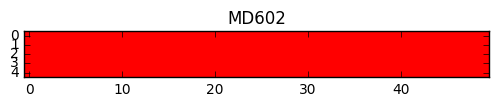

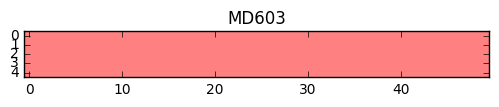

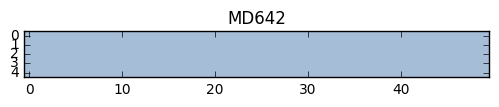

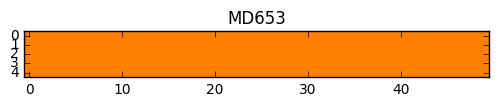

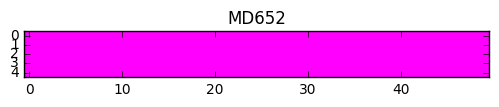

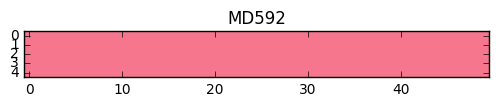

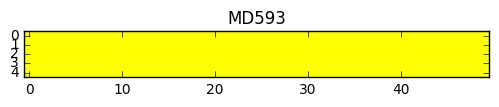

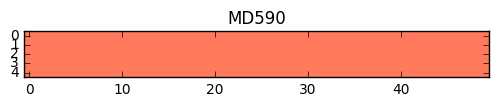

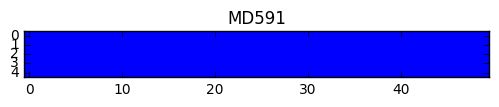

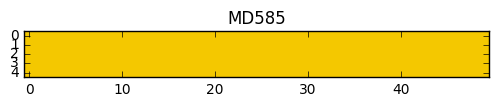

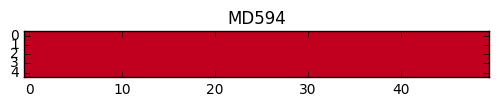

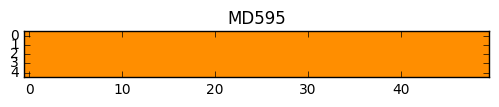

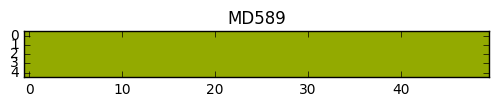

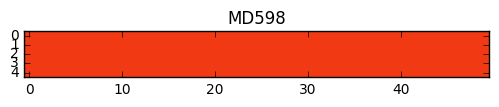

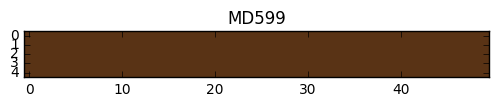

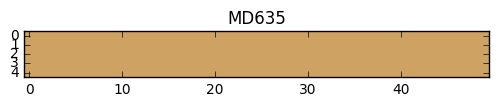

In [21]:
for s, c in stack_colors.iteritems():
    v = np.zeros((5,50,3))
    v[:, :] = np.array(c/255.)
    plt.imshow(v)
    plt.title(s)
    plt.show()

In [22]:
# names_of_interest = ['7N_L', '7N_R', '5N_L', '5N_R', '12N', 'Tz_L', 'Tz_R', '7n_L', '7n_R', 'LRt_L', 'LRt_R',
#                     'Pn_L', 'Pn_R', 'SNR_L', 'SNR_R']

# names_of_interest = ['7N_L']
# names_of_interest = ['Sp5C_R']
names_of_interest = ['5N_L']

# names_of_interest = [n for n in structures_sided \
#                      if '_L' not in n and \
#                      convert_name_to_unsided(n) not in ['AP', 'DC', 'Sp5O', 'Sp5I', 'Sp5C', 'RtTg', 'VCP', 'VCA']]

particular_reversed_structure_actors_all = {}

for name_s_interest in names_of_interest:
    
    if name_s_interest in outliers:
        print 'Outlier stack for %s:' % name_s_interest, outliers[name_s_interest]
        
    particular_reversed_structure_actors = [actor_mesh(p, 
                           wireframe=True, 
    #                        color=structure_colors[convert_name_to_unsided(n)]/255., 
                            color=stack_colors[st]/255.,
                           opacity=1.,
                          origin=(ann_vol_xmin, 
                                  ann_vol_ymin, 
                                  ann_vol_zmin))
                for st, ps in reversed_polydata_list.iteritems() for n, p in ps.iteritems() 
                                            if n == name_s_interest and \
                                            (name_s_interest not in outliers or st not in outliers[name_s_interest])]
    
    particular_reversed_structure_actors_all[name_s_interest] = particular_reversed_structure_actors
    
launch_vtk(
#     [all_atlas_structure_mesh_actors[n] for n in names_of_interest] + \
           [shell_actor] + \
           sum(particular_reversed_structure_actors_all.values(), []), init_angle='horizontal_topDown')

Outlier stack for 5N_L: ['MD603']


In [48]:
launch_vtk(all_atlas_structure_mesh_actors.values() + all_reversed_structure_actors['MD602'] + \
           [shell_actor])

In [119]:
launch_vtk(all_atlas_structure_mesh_actors.values() + sum(all_reversed_structure_actors.values(), []) + \
           [shell_actor])